In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import Equations as eq
import plot_conf as cplot

from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad

In [3]:
cplot.general()

## Fenomenología

In [4]:
def find_nearest(array, value):
    n = [abs(i-value) for i in array]
    idx = n.index(min(n))

    indtest = list(array).index(max(array))

    if (indtest != len(array)-1) and (idx < indtest):
        array_test = array[indtest::]
        n = [abs(i-value) for i in array_test]
        idx = n.index(min(n))
        # print('-->', array_test[idx])
        idx = idx + (indtest - 1)

    return (array[idx], idx)

In [5]:

# Masa = -4*np.pi*g1
mases_Val = [
    10. ,  11.24437228,  12.64359079,  14.21692417, 15.9860388 ,  17.97529715,  20.21209329,
    22.72723014, 25.55534365,  28.73537977,  32.31113076,  36.33183829, 38.18822635170187, 
    40.85287152,  45.93648959,  51.65269899,  58.08021765, 65.30755892,  73.43425049,
    82.57220503,  92.84726129, 104.40091708, 117.39227775, 132.00024733, 148.42599215,
    166.89571111, 187.6637507 , 211.01610755, 237.27436694, 266.80013134, 300. ]  # mases_Val = np.linspace(2.5, 20, 35)


# Example 1
beta_val = np.logspace(-1, 5, 20)  # beta_val = [1, 10, 100, 1000]
rmaxI = 500
a0, a1 = 0.01, 2.  # a0, a1 = 0.01, 1.

from scipy.interpolate import interp1d

data99_total, compactness, mass_profiles = [], [], []
for beta in beta_val:
    data99, compact, mass = [], [], []

    for mas in mases_Val:
        g1 = mas / (-4 * np.pi)
        argB = [a0, a1, g1, rmaxI]
        
        rspan, sol = eq.NDsolverEGBstars(
            beta, argB, Nptos=700000, rmin=1e-02, rmax=1000,
            met='DOP853', Rtol=1e-14, Atol=1e-14
        ) # sol -> [N, g, phi, dN, dphi] met -> 'DOP853' 'RK45'

        # Compute mass profile
        masaP = 8 * np.pi * eq.masaADMProf(rspan, sol[1])
        mass.append([rspan, masaP])

        # Identifying the m99
        valM, indx = find_nearest(masaP, 0.99*mas)
        R99, M99 = rspan[indx], masaP[indx]
        
        data99.append([R99, M99])
        compact.append(M99 / (8 * np.pi * R99))

    data99_total.append(data99)
    mass_profiles.append(mass)
    compactness.append(compact)

/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/scipy/integrate/_ivp/rk.py:505: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  super().__init__(fun, t0, y0, t_bound, max_step, rtol, atol,


In [8]:
# saving
np.savez('data99_total.npz', np.array(data99_total, dtype=object))
np.savez('compactness.npz', np.array(compactness, dtype=object))
np.savez('mass_profiles.npz', np.array(mass_profiles, dtype=object))

In [5]:
# loading
data99_total = np.load('data99_total.npz', allow_pickle=True)['arr_0']
compactness = np.load('compactness.npz', allow_pickle=True)['arr_0']
mass_profiles = np.load('mass_profiles.npz', allow_pickle=True)['arr_0']

beta_val = np.logspace(-1, 5, 20) # [1.0, 1e01, 1e03, 1e04, 1e05]

mases_Val = [10. ,  11.24437228,  12.64359079,  14.21692417, 15.9860388 ,  17.97529715,  20.21209329,
22.72723014, 25.55534365,  28.73537977,  32.31113076,  36.33183829, 38.18822635170187, 
40.85287152,  45.93648959,  51.65269899,  58.08021765, 65.30755892,  73.43425049,
82.57220503,  92.84726129, 104.40091708, 117.39227775, 132.00024733, 148.42599215,
166.89571111, 187.6637507 , 211.01610755, 237.27436694, 266.80013134, 300. ]

# E-KG
EKG_mass_profiles = np.load('EKG_mass_profiles.npz', allow_pickle=True)
EKG_m99_vs_r99_profile = np.load('EKG_m99_vs_r99_profile.npz')

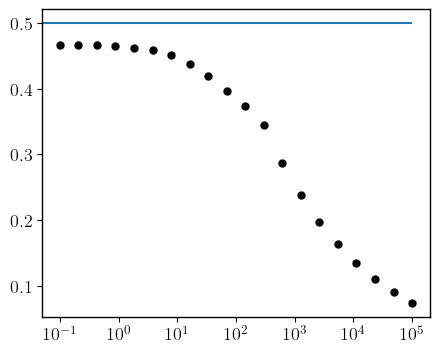

In [6]:
# Compactness
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.25))

for ind, beta in enumerate(beta_val):
    compmax = max(compactness[ind])
    ax.plot(beta, compmax, marker='o', markersize=5, color='k')

ax.hlines(0.5, 0, beta)
ax.set_xscale('log')

In [9]:
a0, a1 = 0.01, 2.

38.18822635170187 12 38.18822635170187


NameError: name 'a0' is not defined

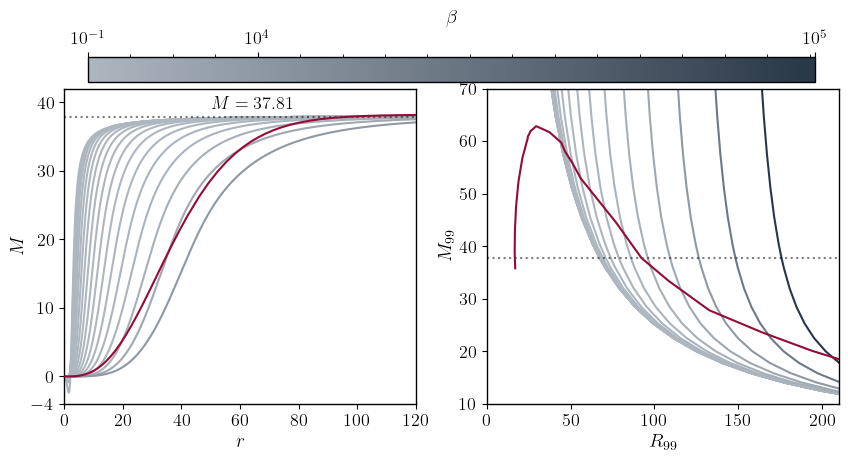

In [7]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter, ScalarFormatter

# creando barra de colores normalizada
cmap = LinearSegmentedColormap.from_list('', ['#aeb6bf','#283747'], N=2000)
norm = mpl.colors.Normalize(vmin=min(beta_val), vmax=max(beta_val)) 
sm = ScalarMappable(norm=norm, cmap=cmap)

#################
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# GR
BS_data_MvsR = EKG_m99_vs_r99_profile['arr_0']
# masprof = interp1d(4 * BS_data_MvsR[:, 0], 4 * 8*np.pi*BS_data_MvsR[:, 1], kind='quadratic')
# radM = np.linspace(4 * BS_data_MvsR[0, 0], 4 * BS_data_MvsR[-1, 0], 100)
ax[1].plot(4 * BS_data_MvsR[:, 0], 4 * 8*np.pi*BS_data_MvsR[:, 1], label = r'$\mathrm{EKG}$ with $m=\lambda_{*} M_{\mathrm{Pl}}/4$', color = "#940B36", zorder=100)
#ax[1].plot(radM, masprof(radM), label = r'$\mathrm{EKG}$ with $m=\lambda_{*} M_{\mathrm{Pl}}/4$', color = "#940B36", zorder=100)

for i, dat99 in enumerate(data99_total):
    ax[1].plot(np.array(dat99)[:, 0], np.array(dat99)[:, 1], color=cmap(beta_val[i]/max(beta_val)))# label=r'$\beta = %1.0e$'%beta_val[i]

####
ax[1].set_xlim(0, 210)
ax[1].set_ylim(10, 70)
ax[1].set_yticks([10, 20, 30, 40, 50, 60, 70])

################

# identify the index of the maximum value in the masses data
ind = 8
massprof = 4 * 8*np.pi*EKG_mass_profiles['arr_0'][ind][1]
valM, indx = find_nearest(mases_Val, massprof[-1])
print(valM, indx, massprof[-1])

for i, dat in enumerate(mass_profiles[2::]):
    rspan, masaP = dat[indx]
    ax[0].plot(rspan, masaP, color=cmap(beta_val[i]/max(beta_val)))# label=r'$\beta = %1.0e$'%beta_val[i]

ax[0].plot(4 * EKG_mass_profiles['arr_0'][ind][0], massprof, label = r'$\mathrm{EKG}$ with $m=\lambda_{*} M_{\mathrm{Pl}}/4$', color = "#940B36", zorder=100) # (BS)

ax[0].set_xlim(0, 120)
ax[0].set_ylim(-4, 42)
ax[0].set_yticks([-4, 0, 10, 20, 30, 40])

ax[0].hlines(massprof[-1] * 0.99, xmin=0, xmax=230, ls=':', lw=1.5, color='k', alpha=0.5)
ax[1].hlines(massprof[-1] * 0.99, xmin=0, xmax=230, ls=':', lw=1.5, color='k', alpha=0.5)
ax[0].text(50, 39, r'$M=%3.2f$'%(massprof[-1] * 0.99), fontsize=13, color="#080808")
#######
cbar = fig.colorbar(sm, fraction=.07, pad=0.02, ax=[ax[0], ax[1]],
                    aspect=30, location='top', ticks=[beta_val[0], beta_val[-3], beta_val[-1]])


# Función para formato "10⁶" en lugar de "1e+6"
def scientific_notation_as_power(x, pos):
    if x == 0:
        return "0"
    exponent = int(np.floor(np.log10(abs(x))))
    return f"$10^{{{exponent}}}$"

# Aplicar formato personalizado
cbar.ax.xaxis.set_major_formatter(FuncFormatter(scientific_notation_as_power))

cbar.ax.set_title(r'$\beta$', fontsize=14)
# cbar.ax.invert_xaxis()

ax[0].set_xlabel(r'$r$', fontsize=14)
ax[1].set_xlabel(r'$R_{99}$', fontsize=14)
ax[0].set_ylabel(r'$M$', fontsize=14)
ax[1].set_ylabel(r'$M_{99}$', fontsize=14)

ax[1].text(8, 14, s=r"$\phi_{\infty}=%3.2f, \;\; a_1=%2.1f$"%(a0, a1), fontsize=13)

ax[0].legend(loc='lower right', fontsize=12, frameon=False)


38.18822635170187 12 38.18822635170187


/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/matplotlib/scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


Text(0.5, 1.0, '$\\beta$')

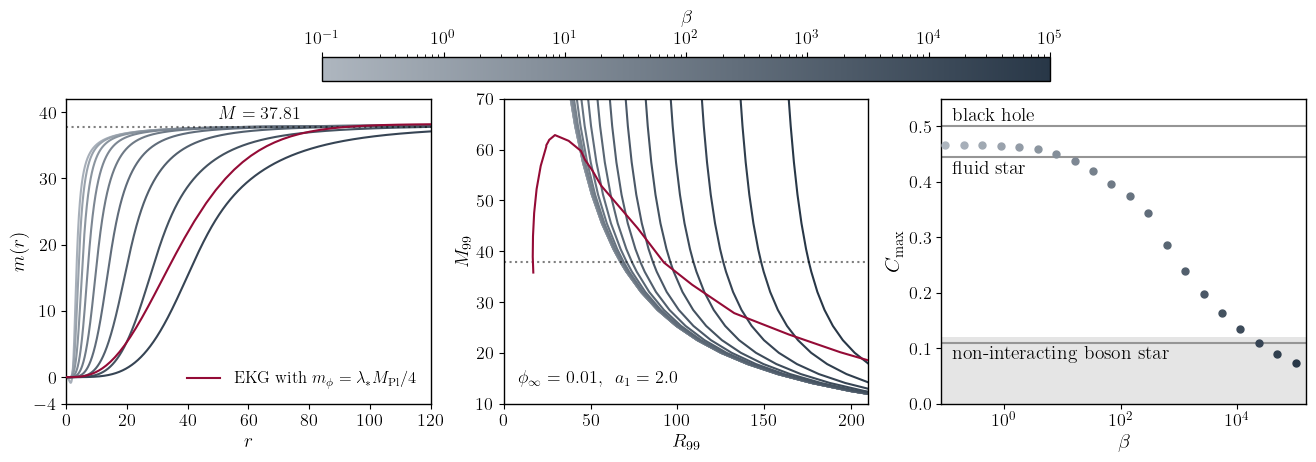

In [12]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
# import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LogNorm

# creando barra de colores normalizada
# norm = mpl.colors.Normalize(vmin=min(beta_val), vmax=max(beta_val)) 
norm = LogNorm(vmin=min(beta_val), vmax=max(beta_val)) # Definir la normalización logarítmica
cmap = LinearSegmentedColormap.from_list('', ['#aeb6bf','#283747'], N=2000)
# cmap = cm.get_cmap('viridis')
sm = ScalarMappable(norm=norm, cmap=cmap)

#################
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5))

# GR
BS_data_MvsR = EKG_m99_vs_r99_profile['arr_0']
ax[1].plot(4 * BS_data_MvsR[:, 0], 4 * 8*np.pi*BS_data_MvsR[:, 1], label = r'$\mathrm{EKG}$ with $m=\lambda_{*} M_{\mathrm{Pl}}/4$', color = "#940B36", zorder=100)

for i, dat99 in enumerate(data99_total):
    ax[1].plot(np.array(dat99)[:, 0], np.array(dat99)[:, 1], color=cmap(norm(beta_val[i])))

####
ax[1].set_xlim(0, 210)
ax[1].set_ylim(10, 70)
ax[1].set_yticks([10, 20, 30, 40, 50, 60, 70])


################################################
# identify the index of the maximum value in the masses data
ind = 8
massprof = 4 * 8*np.pi*EKG_mass_profiles['arr_0'][ind][1]
valM, indx = find_nearest(mases_Val, massprof[-1])
print(valM, indx, massprof[-1])

for i, dat in enumerate(mass_profiles[2::]):
    if i%2==0:
        continue
    rspan, masaP = dat[indx]
    ax[0].plot(rspan, masaP, color=cmap(norm(beta_val[i])))

ax[0].plot(4 * EKG_mass_profiles['arr_0'][ind][0], massprof, label = r'$\mathrm{EKG}$ with $m_{\phi}=\lambda_{*} M_{\mathrm{Pl}}/4$', color = "#940B36", zorder=100) # (BS)

ax[0].set_xlim(0, 120)
ax[0].set_ylim(-4, 42)
ax[0].set_yticks([-4, 0, 10, 20, 30, 40])

ax[0].hlines(massprof[-1] * 0.99, xmin=0, xmax=230, ls=':', lw=1.5, color='k', alpha=0.5)
ax[1].hlines(massprof[-1] * 0.99, xmin=0, xmax=230, ls=':', lw=1.5, color='k', alpha=0.5)
ax[0].text(50, 39, r'$M=%3.2f$'%(massprof[-1] * 0.99), fontsize=13, color="#080808")

################################################

for ind, beta in enumerate(beta_val):
    compmax = max(compactness[ind])
    #ax[2].plot(beta, compmax, marker='o', markersize=5, color=cmap(beta/max(beta_val)))
    ax[2].plot(beta, compmax, marker='o', markersize=5, color=cmap (norm(beta_val[ind])), zorder=100)

ax[2].set_xscale('log')
ax[2].set_ylabel(r'$C_{\mathrm{max}}$')
ax[2].set_xlabel(r'$\beta$')

comGR = np.max(8*np.pi*BS_data_MvsR[:, 1]/(8*np.pi*BS_data_MvsR[:, 0]))

ax[2].axhline(y=4/9, color='#959595', ls='-')
ax[2].axhline(y=1/2, color='#959595', ls='-')
ax[2].axhline(y=comGR, color='#959595', ls='-')
ax[2].text(0.13, 4/9-0.03, r'fluid star', {'color': "#090909"}, fontsize=14)
ax[2].text(0.13, 0.51, r'black hole', {'color': "#0a0a0a"}, fontsize=14)
ax[2].text(0.13, 0.08, r'non-interacting boson star', {'color': "#090909"}, fontsize=14)

ax[2].axhspan(ymin=0, ymax=0.12, xmin=0, xmax=1e05, facecolor='black', alpha=0.1)  # compacness  
ax[2].set_ylim(0, 0.55)
ax[2].set_xlim(8.5e-02, 1.5e05)

################################################
ax[0].set_xlabel(r'$r$', fontsize=14)
ax[1].set_xlabel(r'$R_{99}$', fontsize=14)
ax[0].set_ylabel(r'$m(r)$', fontsize=14)
ax[1].set_ylabel(r'$M_{99}$', fontsize=14)

ax[1].text(8, 14, s=r"$\phi_{\infty}=%3.2f, \;\; a_1=%2.1f$"%(a0, a1), fontsize=13)

ax[0].legend(loc='lower right', fontsize=12, frameon=False)

######
cbar = fig.colorbar(sm, fraction=.07, pad=0.05, ax=[ax[0], ax[1], ax[2]],
                    aspect=30, location='top', ticks=[beta_val[0], 1, 1e01, 1e02, 1e03, 1e04, beta_val[-1]])


# Función para formato "10⁶" en lugar de "1e+6"
def scientific_notation_as_power(x, pos):
    if x == 0:
        return "0"
    exponent = int(np.floor(np.log10(abs(x))))
    return f"$10^{{{exponent}}}$"

# Aplicar formato personalizado
cbar.ax.xaxis.set_major_formatter(FuncFormatter(scientific_notation_as_power))

cbar.ax.set_title(r'$\beta$', fontsize=14)
# cbar.ax.invert_xaxis()



In [13]:
fig.savefig('scalar_masa.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

### Fermionic matter

In [14]:
import pandas as pd

In [15]:
massNS = pd.read_csv("MS_NS.dat", sep="\t", header=0)

In [16]:
def EDO(p, arg):
    k, Gamma = arg
    if Gamma == 1:
        raise ValueError("Gamma must not be 1 to avoid division by zero.")
    epsilon = (p/k)**(1/Gamma) + p/(Gamma - 1)
    return epsilon

In [17]:
def EDOcte(p, arg):
    c = arg
    epsilon = c
    return epsilon

#### Integrating from origin

In [26]:
### de 0 -> Rmax
edo = lambda p: EDO(p, [100, 2])
edoc = lambda p: EDOcte(p, 0.04)

beta_val = [1, 3, 5, 7, 10, 20, 30, 40, 60, 80, 100] # [1.0, 2.0, 5.0, 10.0, 20.0, 50.0]

zeroP_val = 1e-32
scalar0 = 0.5
presval_conj = [
    np.logspace(-6, np.log10(0.15), 100),
    np.logspace(-6, np.log10(0.05), 100),
    np.logspace(-6, np.log10(0.028), 100),
    np.logspace(-6, np.log10(0.018), 100),
    np.logspace(-6, np.log10(0.012), 100),
    np.logspace(-6, np.log10(0.005), 100),
    np.logspace(-6, np.log10(0.003), 100),
    np.logspace(-6, np.log10(0.002), 100),
    np.logspace(-6, np.log10(0.001), 100),
    np.logspace(-6, np.log10(0.0007), 100),
    np.logspace(-6, np.log10(0.0005), 100)
]

data_total = []
for beta in beta_val:
    if beta < 2:
        presval = presval_conj[0]
    elif beta < 5:
        presval = presval_conj[1]
    elif beta < 7:
        presval = presval_conj[2]
    elif beta < 10:
        presval = presval_conj[3]
    elif beta < 15:
        presval = presval_conj[4]
    elif beta < 25:
        presval = presval_conj[5]
    elif beta < 35:
        presval = presval_conj[6]
    elif beta < 45:
        presval = presval_conj[7]
    elif beta < 65:
        presval = presval_conj[8]
    elif beta < 85:
        presval = presval_conj[9]
    else:
        presval = presval_conj[10]
    data = []
    print('===> ', beta, '\n')
    for pres0 in presval:
        n0, g0, p0, dn0, dp0 = 1, 1, scalar0, 0, 0
        V0 = [n0, g0, p0, dn0, dp0, pres0]
        try:
            rspan, sol, R_star = eq.main_NDsolverEGBHstars(beta, edo, V0=V0, argB=None, c1=1, Nptos=100000, rmin=1e-4, rmax=1e2, 
            met='LSODA', Rtol=1e-6, Atol=1e-6, zeroP_val=zeroP_val*pres0)  # LSODA RK45
            masaP = 8*np.pi * eq.masaADMProf(rspan, sol[1])
            data.append([pres0, rspan, masaP, sol, R_star])
        except Exception as e:
            print(f"Error solving for beta={beta}, pres0={pres0}: {e}")
            break
    data_total.append(data)

===>  1 

Solving from interior
Radio =====>   60.87910872390192
Solving from interior
Radio =====>   60.48438572053039
Solving from interior
Radio =====>   60.70959708122239
Solving from interior
Radio =====>   60.34006239130025
Solving from interior
Radio =====>   60.371357340496
Solving from interior
Radio =====>   60.13505953314778
Solving from interior
Radio =====>   60.147960994466175
Solving from interior
Radio =====>   59.82214027413868
Solving from interior
Radio =====>   59.90539091789794
Solving from interior
Radio =====>   59.83215139954901
Solving from interior
Radio =====>   59.629368686851926
Solving from interior
Radio =====>   59.50848693803788
Solving from interior
Radio =====>   59.49996046393139
Solving from interior
Radio =====>   59.204329354519636
Solving from interior
Radio =====>   58.73329870490467
Solving from interior
Radio =====>   58.650649830178864
Solving from interior
Radio =====>   58.54330284239316
Solving from interior
Radio =====>   58.4318365251335

In [27]:
scalar02 = .3

data_total2 = []
for beta in beta_val:
    if beta < 2:
        presval = presval_conj[0]
    elif beta < 5:
        presval = presval_conj[1]
    elif beta < 7:
        presval = presval_conj[2]
    elif beta < 10:
        presval = presval_conj[3]
    elif beta < 15:
        presval = presval_conj[4]
    elif beta < 25:
        presval = presval_conj[5]
    elif beta < 35:
        presval = presval_conj[6]
    elif beta < 45:
        presval = presval_conj[7]
    elif beta < 65:
        presval = presval_conj[8]
    elif beta < 85:
        presval = presval_conj[9]
    else:
        presval = presval_conj[10]
    data = []
    print('===> ', beta, '\n')
    for pres0 in presval:
        n0, g0, p0, dn0, dp0 = 1, 1, scalar02, 0, 0
        V0 = [n0, g0, p0, dn0, dp0, pres0]
        try:
            rspan, sol, R_star = eq.main_NDsolverEGBHstars(beta, edo, V0=V0, argB=None, c1=1, Nptos=100000, rmin=1e-4, rmax=1e2, 
            met='LSODA', Rtol=1e-6, Atol=1e-6, zeroP_val=zeroP_val*pres0)  # LSODA RK45
            masaP = 8*np.pi * eq.masaADMProf(rspan, sol[1])
            data.append([pres0, rspan, masaP, sol, R_star])
        except Exception as e:
            print(f"Error solving for beta={beta}, pres0={pres0}: {e}")
            break
    data_total2.append(data)

===>  1 

Solving from interior
Radio =====>   60.87910865922877
Solving from interior
Radio =====>   60.48438540859409
Solving from interior
Radio =====>   60.70959704488494
Solving from interior
Radio =====>   60.34006493004568
Solving from interior
Radio =====>   60.37135874883018
Solving from interior
Radio =====>   60.13505966791667
Solving from interior
Radio =====>   60.14796117343366
Solving from interior
Radio =====>   59.82214051396866
Solving from interior
Radio =====>   59.90539062898441
Solving from interior
Radio =====>   59.832152113350986
Solving from interior
Radio =====>   59.629368794238836
Solving from interior
Radio =====>   59.50848783712219
Solving from interior
Radio =====>   59.49996105486445
Solving from interior
Radio =====>   59.204327410848705
Solving from interior
Radio =====>   58.7332963694064
Solving from interior
Radio =====>   58.65064720918855
Solving from interior
Radio =====>   58.543303648940565
Solving from interior
Radio =====>   58.431836925982

In [28]:
scalar03 = 0. # GR

data_total3 = []
for beta in [0]:
    if beta < 2:
        presval = presval_conj[0]
    elif beta < 5:
        presval = presval_conj[1]
    elif beta < 7:
        presval = presval_conj[2]
    elif beta < 10:
        presval = presval_conj[3]
    elif beta < 15:
        presval = presval_conj[4]
    elif beta < 25:
        presval = presval_conj[5]
    elif beta < 35:
        presval = presval_conj[6]
    elif beta < 45:
        presval = presval_conj[7]
    elif beta < 65:
        presval = presval_conj[8]
    elif beta < 85:
        presval = presval_conj[9]
    else:
        presval = presval_conj[10]
    data = []
    print('===> ', beta, '\n')
    for pres0 in presval:
        n0, g0, p0, dn0, dp0 = 1, 1, scalar03, 0, 0
        V0 = [n0, g0, p0, dn0, dp0, pres0]
        try:
            rspan, sol, R_star = eq.main_NDsolverEGBHstars(beta, edo, V0=V0, argB=None, c1=1, Nptos=100000, rmin=1e-4, rmax=1e2, 
            met='LSODA', Rtol=1e-6, Atol=1e-6, zeroP_val=zeroP_val*pres0)  # LSODA RK45
            masaP = 8*np.pi * eq.masaADMProf(rspan, sol[1])
            data.append([pres0, rspan, masaP, sol, R_star])
        except Exception as e:
            print(f"Error solving for beta={beta}, pres0={pres0}: {e}")
            break
    data_total3.append(data)

===>  0 

Solving from interior
Radio =====>   60.879109336410174
Solving from interior
Radio =====>   60.48438644940334
Solving from interior
Radio =====>   60.70959684005721
Solving from interior
Radio =====>   60.34005844245949
Solving from interior
Radio =====>   60.37135856616899
Solving from interior
Radio =====>   60.13505957549623
Solving from interior
Radio =====>   60.147961277675236
Solving from interior
Radio =====>   59.82214071624936
Solving from interior
Radio =====>   59.90539105733117
Solving from interior
Radio =====>   59.83215268512488
Solving from interior
Radio =====>   59.629369750631064
Solving from interior
Radio =====>   59.50848787427685
Solving from interior
Radio =====>   59.49996130609476
Solving from interior
Radio =====>   59.204327739173365
Solving from interior
Radio =====>   58.73329731879253
Solving from interior
Radio =====>   58.65064616700583
Solving from interior
Radio =====>   58.543303782287346
Solving from interior
Radio =====>   58.4318372141

In [29]:
# Masa 99.9
porc = 0.999

def find_nearest(array, value):
    n = [abs(i-value) for i in array]
    idx = n.index(min(n))
    return (array[idx], idx)

data99_total = []
for data_beta in data_total:
    data99 = []
    for data in data_beta:
        pres0, rspan, masaP, sol, R_star = data
        mas = masaP[-1]
        valM, indx = find_nearest(masaP, porc * mas)
        R99, M99 = rspan[indx], masaP[indx]
        print(porc * mas, valM, ' -> ', R99, M99)
        data99.append([R99, M99])
    data99_total.append(data99)
data99_total = np.array(data99_total, dtype=object)


data99_total2 = []
for data_beta in data_total2:
    data99 = []
    for data in data_beta:
        pres0, rspan, masaP, sol, R_star = data
        mas = masaP[-1]
        valM, indx = find_nearest(masaP, porc * mas)
        R99, M99 = rspan[indx], masaP[indx]
        print(porc * mas, valM, ' -> ', R99, M99)
        data99.append([R99, M99])
    data99_total2.append(data99)
data99_total2 = np.array(data99_total2, dtype=object)


data99_total3 = []
for data_beta in data_total3:
    data99 = []
    for data in data_beta:
        pres0, rspan, masaP, sol, R_star = data
        mas = masaP[-1]
        valM, indx = find_nearest(masaP, porc * mas)
        R99, M99 = rspan[indx], masaP[indx]
        print(porc * mas, valM, ' -> ', R99, M99)
        data99.append([R99, M99])
    data99_total3.append(data99)
data99_total3 = np.array(data99_total3, dtype=object)

28.951210912894084 28.951202477536086  ->  60.10164091440914 28.951202477536086
30.591928417636538 30.591931793332297  ->  59.89663906939069 30.591931793332297
32.33390593920182 32.33389185493233  ->  59.935639420394196 32.33389185493233
34.1571201966469 34.157105986420234  ->  59.781638034380336 34.157105986420234
36.073307248900086 36.07331163575383  ->  59.663636972369716 36.07331163575383
38.06298136453036 38.06295596706984  ->  59.38463446134461 38.06295596706984
40.17854474900149 40.17857068235014  ->  59.42063478534785 40.17857068235014
42.37057456998789 42.37055432956463  ->  59.15663240932409 42.37055432956463
44.68701688305198 44.68703737762369  ->  59.15963243632436 44.68703737762369
47.09964844006782 47.099695295911175  ->  59.029631266312656 47.099695295911175
49.620207211097174 49.62025908607461  ->  58.86162975429754 49.62025908607461
52.2460061422584 52.24605236937417  ->  58.71462843128431 52.24605236937417
55.091504978119985 55.09151793140552  ->  58.662627963279625 5

25.097180644119888 130.2310553231397
24.36731930519305 130.1007734435505


(15.0, 57.5)

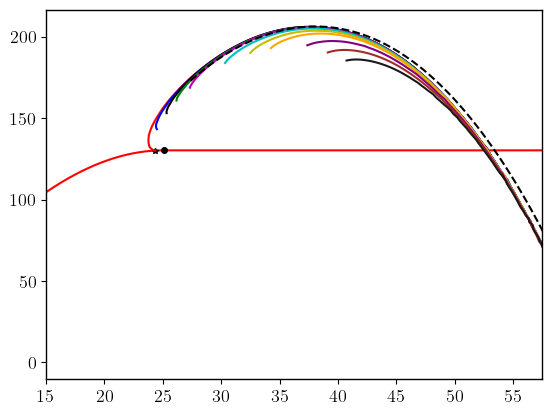

In [30]:
masaP = eq.masaADMProf(rspan, sol[1])
col = ['r', 'b', 'k', 'g', 'm', 'c', 'y', 'orange', 'purple', 'brown', '#1a1919', 'y', 'orange', 'purple', 'brown', '#1a1919']
# Plotting
k = 0
for ind, data_beta in enumerate(data_total):
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        if ind==0 and k==99:
            plt.plot(rspan, masaP, label='n=%1.2f'%pres0, color=col[ind])
            plt.plot(R_star, masaP[-1], 'o', markersize=4, c='k')
            print(R_star, masaP[-1])
        k += 1
    
    x = np.array(data99_total[ind])[:, 0]
    y = np.array(data99_total[ind])[:, 1]
    if ind==0:
        print(x[-1], y[-1])
        plt.plot(x[-1], y[-1], '*', markersize=4, c='k')
    plt.plot(x, y, ls='-', color=col[ind], label=r'$\beta=%3.2f$'%beta_val[ind])  # marker='o', markersize=3, 

plt.plot(massNS['r'], massNS['M'], ls='--', c='k')
#plt.vlines(x=rS, ymin=-0.5, ymax=3.5, ls=':', color=col[0], alpha=0.4)
plt.xlim(15, 57.5)
#plt.ylim(0, 30)
#plt.legend(ncol=2)

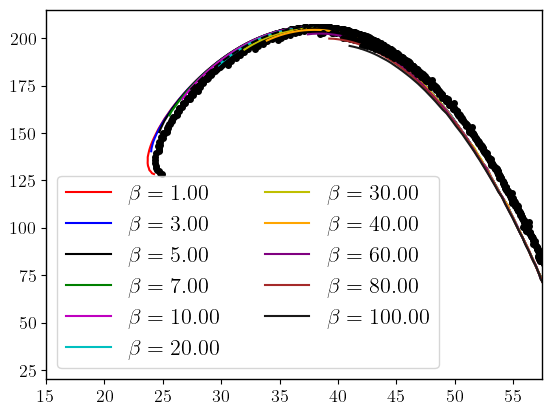

In [31]:
# Plotting
for ind, data_beta in enumerate(data_total2):
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        #plt.plot(rspan, masaP, label='n=%1.2f'%pres0, color=col[ind])
        plt.plot(R_star, masaP[-1], 'o', markersize=4, c='k')
    
    x = np.array(data99_total2[ind])[:, 0]
    y = np.array(data99_total2[ind])[:, 1]
    plt.plot(x, y, ls='-', color=col[ind], label=r'$\beta=%3.2f$'%beta_val[ind])  # marker='o', markersize=3, 

plt.plot(massNS['r'], massNS['M'], ls='--', c='k')
#plt.vlines(x=rS, ymin=-0.5, ymax=3.5, ls=':', color=col[0], alpha=0.4)
plt.xlim(15, 57.5)
#plt.ylim(0, 30)
plt.legend(ncol=2)

24.76120383136865 127.59488964337795
24.147317325173248 127.46727427435795


(15.0, 57.5)

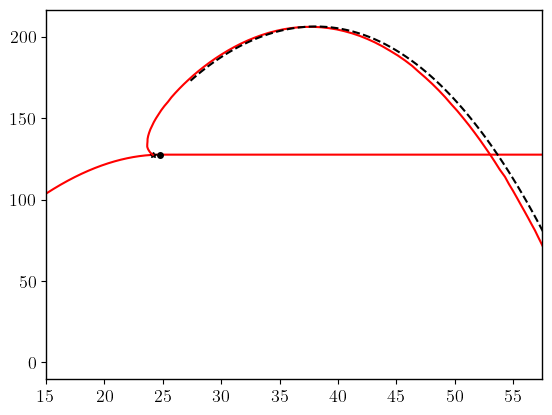

In [32]:
# Plotting
col = ['r', 'b', 'k', 'g', 'm', 'c', 'y', 'orange', 'purple', 'brown', '#1a1919', 'y', 'orange', 'purple', 'brown', '#1a1919']

k = 0 
for ind, data_beta in enumerate(data_total3):
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        #plt.plot(rspan, masaP, label='n=%1.2f'%pres0, color=col[ind])
        #plt.plot(R_star, masaP[-1], 'o', markersize=4, c='k')
        if ind==0 and k==99:
            plt.plot(rspan, masaP, label='n=%1.2f'%pres0, color=col[ind])
            plt.plot(R_star, masaP[-1], 'o', markersize=4, c='k')
            print(R_star, masaP[-1])
        k += 1
    
    x = np.array(data99_total3[ind])[:, 0]
    y = np.array(data99_total3[ind])[:, 1]
    if ind==0:
        print(x[-1], y[-1])
        plt.plot(x[-1], y[-1], '*', markersize=4, c='k')
    plt.plot(x, y, ls='-', color=col[ind], label=r'$\beta=%3.2f$'%beta_val[ind])  # marker='o', markersize=3, 

plt.plot(massNS['r'], massNS['M'], ls='--', c='k')
#plt.vlines(x=rS, ymin=-0.5, ymax=3.5, ls=':', color=col[0], alpha=0.4)
plt.xlim(15, 57.5)
#plt.ylim(0, 30)
#plt.legend(ncol=2)

In [33]:
from matplotlib.collections import LineCollection

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html
def colored_line(x, y, c, ax, cmap, **lc_kwargs):
    """
    Plot a line with a color specified along the line by a third value.

    It does this by creating a collection of line segments. Each line segment is
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should be the same size as x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """
    if "array" in lc_kwargs:
        warnings.warn('The provided "array" keyword argument will be overridden')

    # Default the capstyle to butt so that the line segments smoothly line up
    default_kwargs = {"capstyle": "butt"}
    default_kwargs.update(lc_kwargs)

    # Compute the midpoints of the line segments. Include the first and last points
    # twice so we don't need any special syntax later to handle them.
    x = np.asarray(x)
    y = np.asarray(y)
    x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
    y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

    # Determine the start, middle, and end coordinate pair of each line segment.
    # Use the reshape to add an extra dimension so each pair of points is in its
    # own list. Then concatenate them to create:
    # [
    #   [(x1_start, y1_start), (x1_mid, y1_mid), (x1_end, y1_end)],
    #   [(x2_start, y2_start), (x2_mid, y2_mid), (x2_end, y2_end)],
    #   ...
    # ]
    coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
    coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
    coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
    segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

    lc = LineCollection(segments, color=cmap(c), **default_kwargs) # 
    #lc.set_array(c)  # set the colors of each segment

    return ax.add_collection(lc)

In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter, ScalarFormatter
from matplotlib.colors import LogNorm

Text(0, 0.5, '$M_{99}$')

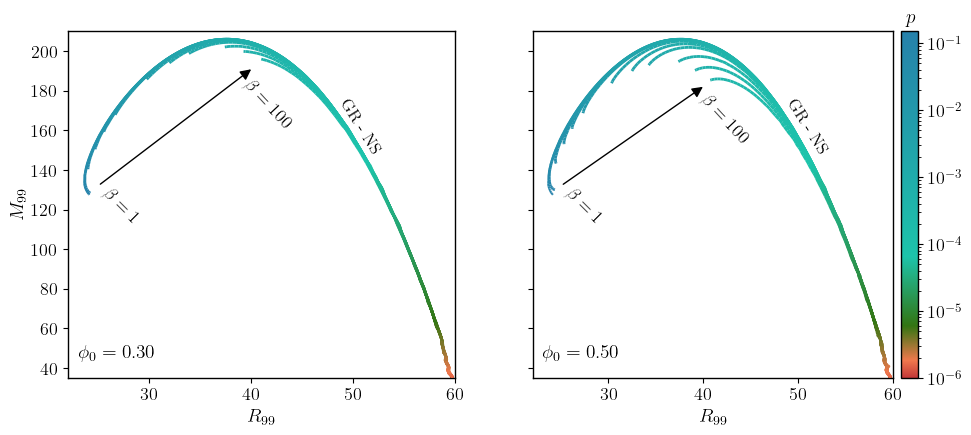

In [35]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

# creando barra de colores normalizada
cmap = LinearSegmentedColormap.from_list('', 
                                        [(0, '#c23838'),
                                         (0.05, '#f0784d'),  # (0.25, '#f0784d')
                                         (0.15, '#337512'),
                                         (0.35, '#1dc4ab'),
                                         (1, '#2681ab')], N=2000)

maxiP = max([np.max(presval_conj), np.max(massNS['p'])])
minP = min([np.min(presval_conj), np.min(massNS['p'])])
#norm = mpl.colors.Normalize(vmin=minP,
#                            vmax=maxiP)
norm = LogNorm(vmin=minP, vmax=maxiP) 
sm = ScalarMappable(norm=norm, cmap=cmap)

#################################################################
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4.5), sharey=True)

# GR
#color = norm(massNS['p'])  # massNS['p']/maxiP. #massNS['p'].tolist()
#lines = colored_line(massNS['r'], massNS['M'], color, ax[1], linewidth=2, cmap=cmap, zorder=100)

for ind, data_beta in enumerate(data_total3):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    x = np.array(data99_total3[ind])[:, 0]
    y = np.array(data99_total3[ind])[:, 1]
    color = norm(data_plot[:, 0]) # data_plot[:, 0]/maxiP
    colored_line(x, y, color, ax[1], linewidth=1.5, cmap=cmap, zorder=100)
#ax[1].plot(x, y, ls='--', lw=0.5, zorder=100, c='k')

# GB
for ind, data_beta in enumerate(data_total):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total[ind])[:, 0]
    y = np.array(data99_total[ind])[:, 1]
    color = norm(data_plot[:, 0])
    colored_line(x, y, color, ax[1], linewidth=2, cmap=cmap)

cbar = fig.colorbar(sm, fraction=0.05, pad=0.02, ax=ax[1], aspect=20, location='right',
                    ticks=[minP, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]) # , format='%3.2f'

# Función para formato "10⁶" en lugar de "1e+6"
def scientific_notation_as_power(x, pos):
    # Convert to scientific notation string
    sci_str = f"{x:e}"  # -> '2.500000e-05'
    # Split into mantissa and exponent
    mantissa_str, exponent_str = sci_str.split('e')
    mantissa = float(mantissa_str)
    exponent = int(exponent_str)
    if mantissa != 1:
        resul =  fr"${mantissa} \times 10^{{{exponent}}}$"
    else:
        resul =  fr"$10^{{{exponent}}}$"
    return resul

# Aplicar formato personalizado
cbar.ax.yaxis.set_major_formatter(FuncFormatter(scientific_notation_as_power))
cbar.ax.set_title(r'$p$', fontsize=14)

#
ax[1].text(x=25.2, y=113, s=fr'$\beta={beta_val[0]}$', fontsize=13, rotation=-45)
ax[1].text(x=39.5, y=153, s=fr'$\beta={beta_val[-1]}$', fontsize=13, rotation=-47)
ax[1].text(x=48.5, y=148, s=fr'GR - NS', fontsize=12, rotation=-58)

ax[1].annotate(" ",
            xy=(25, 132), xycoords='data',
            xytext=(40.5, 181), textcoords='data',
            arrowprops=dict(facecolor='black', arrowstyle="<|-", connectionstyle="arc3"))

ax[1].text(x=23, y=45, s=r'$\phi_0=%3.2f$'%scalar0, fontsize=14)
ax[1].plot([],[])

############################################

# GR
for ind, data_beta in enumerate(data_total3):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    x = np.array(data99_total3[ind])[:, 0]
    y = np.array(data99_total3[ind])[:, 1]
    color = norm(data_plot[:, 0]) # data_plot[:, 0]/maxiP
    lines = colored_line(x, y, color, ax[0], linewidth=1.5, cmap=cmap, zorder=100)
#ax[0].plot(x, y, ls='--', lw=0.5, zorder=100, c='k')

# GB
for ind, data_beta in enumerate(data_total2):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total2[ind])[:, 0]
    y = np.array(data99_total2[ind])[:, 1]
    color = norm(data_plot[:, 0])
    colored_line(x, y, color, ax[0], linewidth=2, cmap=cmap)

ax[0].plot([],[])

#
ax[0].text(x=25.2, y=113, s=fr'$\beta={beta_val[0]}$', fontsize=13, rotation=-45)
ax[0].text(x=39, y=161, s=fr'$\beta={beta_val[-1]}$', fontsize=13, rotation=-47)
ax[0].text(x=48.5, y=148, s=fr'GR - NS', fontsize=12, rotation=-58)

ax[0].annotate(" ",
            xy=(25, 132), xycoords='data',
            xytext=(40.5, 190), textcoords='data',
            arrowprops=dict(facecolor='black', arrowstyle="<|-", connectionstyle="arc3"))

ax[0].text(x=23, y=45, s=r'$\phi_0=%3.2f$'%scalar02, fontsize=14)

################################################
ax[0].set_xlim(22, 60)
ax[0].set_ylim(35, 210)
ax[1].set_xlim(22, 60)

ax[0].set_xlabel(r'$R_{99}$', fontsize=14)
ax[1].set_xlabel(r'$R_{99}$', fontsize=14)
ax[0].set_ylabel(r'$M_{99}$', fontsize=14)

Text(0, 0.5, '$M_{99}$')

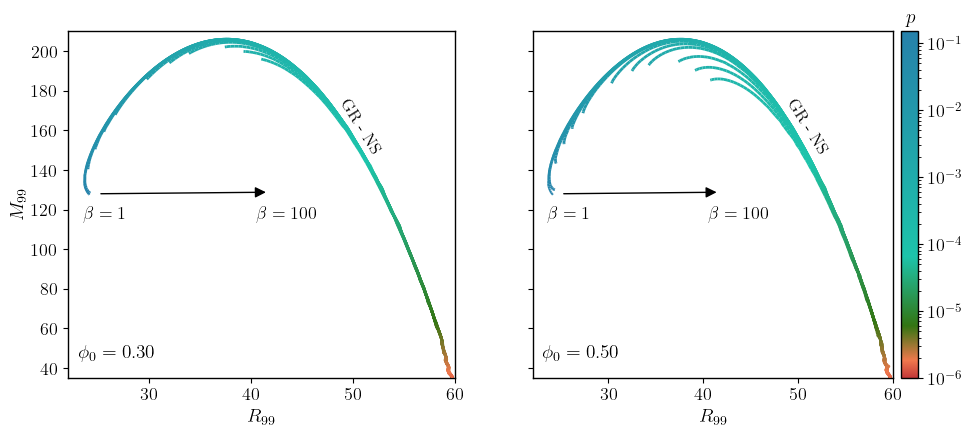

In [69]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

# creando barra de colores normalizada
cmap = LinearSegmentedColormap.from_list('', 
                                        [(0, '#c23838'),
                                         (0.05, '#f0784d'),  # (0.25, '#f0784d')
                                         (0.15, '#337512'),
                                         (0.35, '#1dc4ab'),
                                         (1, '#2681ab')], N=2000)

maxiP = max([np.max(presval_conj), np.max(massNS['p'])])
minP = min([np.min(presval_conj), np.min(massNS['p'])])
#norm = mpl.colors.Normalize(vmin=minP,
#                            vmax=maxiP)
norm = LogNorm(vmin=minP, vmax=maxiP) 
sm = ScalarMappable(norm=norm, cmap=cmap)

#################################################################
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4.5), sharey=True)

# GR
#color = norm(massNS['p'])  # massNS['p']/maxiP. #massNS['p'].tolist()
#lines = colored_line(massNS['r'], massNS['M'], color, ax[1], linewidth=2, cmap=cmap, zorder=100)

for ind, data_beta in enumerate(data_total3):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    x = np.array(data99_total3[ind])[:, 0]
    y = np.array(data99_total3[ind])[:, 1]
    color = norm(data_plot[:, 0]) # data_plot[:, 0]/maxiP
    colored_line(x, y, color, ax[1], linewidth=1.5, cmap=cmap, zorder=100)
#ax[1].plot(x, y, ls='--', lw=0.5, zorder=100, c='k')

# GB
for ind, data_beta in enumerate(data_total):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total[ind])[:, 0]
    y = np.array(data99_total[ind])[:, 1]
    color = norm(data_plot[:, 0])
    colored_line(x, y, color, ax[1], linewidth=2, cmap=cmap)

cbar = fig.colorbar(sm, fraction=0.05, pad=0.02, ax=ax[1], aspect=20, location='right',
                    ticks=[minP, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]) # , format='%3.2f'

# Función para formato "10⁶" en lugar de "1e+6"
def scientific_notation_as_power(x, pos):
    # Convert to scientific notation string
    sci_str = f"{x:e}"  # -> '2.500000e-05'
    # Split into mantissa and exponent
    mantissa_str, exponent_str = sci_str.split('e')
    mantissa = float(mantissa_str)
    exponent = int(exponent_str)
    if mantissa != 1:
        resul =  fr"${mantissa} \times 10^{{{exponent}}}$"
    else:
        resul =  fr"$10^{{{exponent}}}$"
    return resul

# Aplicar formato personalizado
cbar.ax.yaxis.set_major_formatter(FuncFormatter(scientific_notation_as_power))
cbar.ax.set_title(r'$p$', fontsize=14)

#
ax[1].text(x=23.5, y=115, s=fr'$\beta={beta_val[0]}$', fontsize=13, rotation=0)
ax[1].text(x=40.5, y=115, s=fr'$\beta={beta_val[-1]}$', fontsize=13, rotation=0)
ax[1].text(x=48.5, y=148, s=fr'GR - NS', fontsize=12, rotation=-58)

ax[1].annotate(" ",
            xy=(25, 128), xycoords='data',
            xytext=(42, 126), textcoords='data',
            arrowprops=dict(facecolor='black', arrowstyle="<|-", connectionstyle="arc3"))

ax[1].text(x=23, y=45, s=r'$\phi_0=%3.2f$'%scalar0, fontsize=14)
ax[1].plot([],[])

############################################

# GR
for ind, data_beta in enumerate(data_total3):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    x = np.array(data99_total3[ind])[:, 0]
    y = np.array(data99_total3[ind])[:, 1]
    color = norm(data_plot[:, 0]) # data_plot[:, 0]/maxiP
    lines = colored_line(x, y, color, ax[0], linewidth=1.5, cmap=cmap, zorder=100)
#ax[0].plot(x, y, ls='--', lw=0.5, zorder=100, c='k')

# GB
for ind, data_beta in enumerate(data_total2):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total2[ind])[:, 0]
    y = np.array(data99_total2[ind])[:, 1]
    color = norm(data_plot[:, 0])
    colored_line(x, y, color, ax[0], linewidth=2, cmap=cmap)

ax[0].plot([],[])

#
ax[0].text(x=23.5, y=115, s=fr'$\beta={beta_val[0]}$', fontsize=13, rotation=0)
ax[0].text(x=40.5, y=115, s=fr'$\beta={beta_val[-1]}$', fontsize=13, rotation=0)
ax[0].text(x=48.5, y=148, s=fr'GR - NS', fontsize=12, rotation=-58)

ax[0].annotate(" ",
            xy=(25, 128), xycoords='data',
            xytext=(42, 126), textcoords='data',
            arrowprops=dict(facecolor='black', arrowstyle="<|-", connectionstyle="arc3"))

ax[0].text(x=23, y=45, s=r'$\phi_0=%3.2f$'%scalar02, fontsize=14)

################################################
ax[0].set_xlim(22, 60)
ax[0].set_ylim(35, 210)
ax[1].set_xlim(22, 60)

ax[0].set_xlabel(r'$R_{99}$', fontsize=14)
ax[1].set_xlabel(r'$R_{99}$', fontsize=14)
ax[0].set_ylabel(r'$M_{99}$', fontsize=14)

In [70]:
fig.savefig('barionic_regular_masa.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [71]:
# Configuraciones con igual masa y Rs

# Con materia
edo = lambda p: EDO(p, [100, 2])
edoc = lambda p: EDOcte(p, 0.04)

data_total_div = []
for ind, data_beta in enumerate(data_total):
    beta = beta_val[ind]
    data_div = []
    for data in data_beta:
        pres0, rspan, masaP, sol, R_star = data
        pR = zeroP_val*pres0 # 1e-08
        rmaxI = 400
        a0, a1, g1 = 0.01, 1., masaP[-1]/(-4*np.pi)
        argB = [a0, a1, g1, rmaxI, R_star, pR]
        rspan, sol = eq.main_NDsolverEGBHstars(beta, edo, V0=None, argB=argB, c1=1, Nptos=50000, rmin=1e-4, rmax=1e3,
                                                   met='LSODA', Rtol=1e-10, Atol=1e-10)
        masaP = 8*np.pi * eq.masaADMProf(rspan, sol[1])
        data_div.append([sol[-1][0], rspan, masaP, sol, R_star])
    data_total_div.append(data_div)

Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving from exterior
We are integrating from R to the origin
Solving 

In [72]:
# Masa 99
porc = 0.997
def find_nearest(array, value):
    n = [abs(i-value) for i in array]
    idx = n.index(min(n))
    return (array[idx], idx)

data99_total_div = []
for data_beta in data_total_div:
    data99 = []
    for data in data_beta[::3]:
        pres0, rspan, masaP, sol, R_star = data
        mas = masaP[-1]
        valM, indx = find_nearest(masaP, porc * mas)
        R99, M99 = rspan[indx], masaP[indx]
        print(porc * mas, valM, ' -> ', R99, M99)
        data99.append([R99, M99, pres0])
        # data99.append([R_star, masaP[-1], pres0])
    data99_total_div.append(data99)
data99_total_div = np.array(data99_total_div, dtype=object)

28.88698492966071 28.886980858522882  ->  68.57052436635672 28.886980858522882
34.08247200495913 34.08247132255535  ->  60.13369559258603 34.08247132255535
40.09184120934666 40.09182057239341  ->  59.556094204944834 40.09182057239341
46.999088279458874 46.999111394293415  ->  59.05431917471038 46.999111394293415
54.97494408483309 54.97486422514667  ->  58.59554449656028 54.97486422514667
63.85266073186416 63.85271708971927  ->  57.665300886052975 63.85271708971927
73.78455764346478 73.7846106390297  ->  57.12036484161042 73.7846106390297
84.74402685902113 84.74391929140738  ->  56.39368572601269 84.74391929140738
96.63829532371741 96.63824407708147  ->  55.339812943171744 96.63824407708147
109.35435611221064 109.35417777230953  ->  54.272254064144256 109.35417777230953
122.63320543533496 122.6333439662951  ->  53.07747783512266 122.6333439662951
136.19992935600078 136.19983944482848  ->  51.78680945371683 136.19983944482848
149.64199412041674 149.64215682001367  ->  50.38447346699738 1

42.4398021182101 185.5640979850201
41.52223740712018 185.00728197874201


(15.0, 57.5)

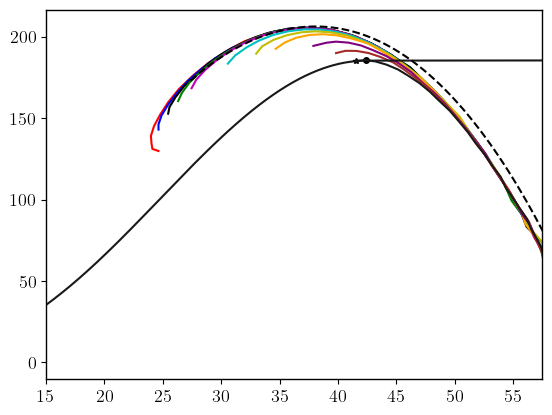

In [73]:
# Plotting
col = ['r', 'b', 'k', 'g', 'm', 'c', 'y', 'orange', 'purple', 'brown', '#1a1919', 'y', 'orange', 'purple', 'brown', '#1a1919']
indb = 10
for ind, data_beta in enumerate(data_total_div):
    k = 0 
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        #plt.plot(rspan, masaP, label='n=%1.2f'%pres0, color=col[ind])
        #plt.plot(R_star, masaP[-1], 'o', markersize=4, c='k')
        if ind==indb and k==len(data_beta)-1:
            plt.plot(rspan, masaP, label='n=%1.2f'%pres0, color=col[ind])
            plt.plot(R_star, masaP[-1], 'o', markersize=4, c='k')
            print(R_star, masaP[-1])
        k += 1
    
    x = np.array(data99_total_div[ind])[:, 0]
    y = np.array(data99_total_div[ind])[:, 1]
    if ind==indb:
        print(x[-1], y[-1])
        plt.plot(x[-1], y[-1], '*', markersize=4, c='k')
    plt.plot(x, y, ls='-', color=col[ind], label=r'$\beta=%3.2f$'%beta_val[ind])  # marker='o', markersize=3, 

plt.plot(massNS['r'], massNS['M'], ls='--', c='k')
#plt.vlines(x=rS, ymin=-0.5, ymax=3.5, ls=':', color=col[0], alpha=0.4)
plt.xlim(15, 57.5)
#plt.ylim(0, 30)
#plt.legend(ncol=2)

In [74]:
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter, ScalarFormatter

1
100


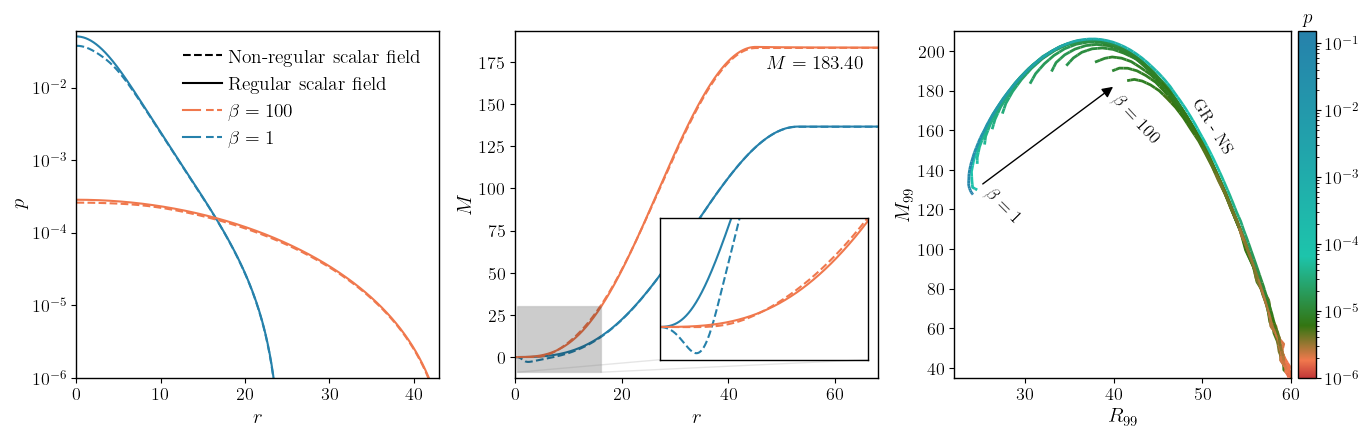

In [75]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

# creando barra de colores normalizada
cmap = LinearSegmentedColormap.from_list('', 
                                        [(0, '#c23838'),
                                         (0.05, '#f0784d'),  # (0.25, '#f0784d')
                                         (0.15, '#337512'),
                                         (0.35, '#1dc4ab'),
                                         (1, '#2681ab')], N=2000)

maxiP = max([np.max(presval_conj), np.max(massNS['p'])])
minP = min([np.min(presval_conj), np.min(massNS['p'])])
#norm = mpl.colors.Normalize(vmin=minP,
#                            vmax=maxiP)
norm = LogNorm(vmin=minP, vmax=maxiP) 
sm = ScalarMappable(norm=norm, cmap=cmap)

#################################################################
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5), sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.21))

# GR
#color = massNS['p']/maxiP
#lines = colored_line(massNS['r'], massNS['M'], color, ax[2], linewidth=2, cmap=cmap, zorder=100)

for ind, data_beta in enumerate(data_total3):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    x = np.array(data99_total3[ind])[:, 0]
    y = np.array(data99_total3[ind])[:, 1]
    color = norm(data_plot[:, 0]) # data_plot[:, 0]/maxiP
    colored_line(x, y, color, ax[2], linewidth=2, cmap=cmap, zorder=100)
#ax[2].plot(x, y, ls='--', lw=0.5, zorder=100, c='k')

# GB
for ind, data_beta in enumerate(data_total_div):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total_div[ind])[:, 0]
    y = np.array(data99_total_div[ind])[:, 1]
    color = norm(data_plot[:, 0])
    colored_line(x, y, c=color, ax=ax[2], linewidth=2, cmap=cmap)

ax[0].plot([],[])

cbar = fig.colorbar(sm, fraction=0.05, pad=0.02, ax=ax[2], aspect=20, location='right',
                    ticks=[minP, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]) # , format='%3.2f'

# Función para formato "10⁶" en lugar de "1e+6"
def scientific_notation_as_power(x, pos):
    # Convert to scientific notation string
    sci_str = f"{x:e}"  # -> '2.500000e-05'
    # Split into mantissa and exponent
    mantissa_str, exponent_str = sci_str.split('e')
    mantissa = float(mantissa_str)
    exponent = int(exponent_str)
    if mantissa != 1:
        resul =  fr"${mantissa} \times 10^{{{exponent}}}$"
    else:
        resul =  fr"$10^{{{exponent}}}$"
    return resul

# Aplicar formato personalizado
cbar.ax.yaxis.set_major_formatter(FuncFormatter(scientific_notation_as_power))
cbar.ax.set_title(r'$p$', fontsize=14)

#
ax[2].text(x=25.2, y=113, s=fr'$\beta={beta_val[0]}$', fontsize=13, rotation=-45)
ax[2].text(x=39.5, y=153, s=fr'$\beta={beta_val[-1]}$', fontsize=13, rotation=-47)
ax[2].text(x=48.5, y=148, s=fr'GR - NS', fontsize=12, rotation=-58)

ax[2].annotate(" ",
            xy=(25, 132), xycoords='data',
            xytext=(40.5, 181), textcoords='data',
            arrowprops=dict(facecolor='black', arrowstyle="<|-", connectionstyle="arc3"))

ax[2].set_xlabel(r'$R_{99}$') # , fontsize=14
ax[2].set_ylabel(r'$M_{99}$')

ax[2].set_ylim(35, 210)
ax[2].set_xlim(22, 60)


############################################

indbeta2 = 0; indM = 33
print(beta_val[indbeta2])

ax[1].plot(data_total[indbeta2][indM][1], data_total[indbeta2][indM][2], c=col[2])
ax[1].plot(data_total_div[indbeta2][indM][1], data_total_div[indbeta2][indM][2], ls='--', c=col[2])

indbeta = -1; indM = 90
print(beta_val[indbeta])

ax[1].plot(data_total[indbeta][indM][1], data_total[indbeta][indM][2], c=col[1])
ax[1].plot(data_total_div[indbeta][indM][1], data_total_div[indbeta][indM][2], ls='--', c=col[1])


# line0, = ax[1].plot([], [], c='k', ls='--', label=r'non-regular scalar field')
# line1, = ax[1].plot([], [], c='k', ls='-', label=r'regular scalar field')
# line2, = ax[1].plot([], [], c=col[1], ls='-', label=r'$\beta = %d$'%beta_val[indbeta])
# line3, = ax[1].plot([], [], c=col[1], ls='--', label=r'$\beta = %d$'%beta_val[indbeta])
# line4, = ax[1].plot([], [], c=col[2], ls='-', label=r'$\beta = %d$'%beta_val[indbeta2])
# line5, = ax[1].plot([], [], c=col[2], ls='--', label=r'$\beta = %d$'%beta_val[indbeta2])

ax[1].set_xlim(0, 68)
#ax[1].set_ylim(-5, 110)

# Crear una leyenda con un solo label para ambos estilos
# ax[1].legend(loc=(0.01, 0.7), handles=[line0, line1, (line2, line3), (line4, line5)], handletextpad=0.3,
#             labels=[r'non-regular scalar field', r'regular scalar field', 
#              r'$\beta = %d$'%beta_val[indbeta], r'$\beta = %d$'%beta_val[indbeta2]], handler_map={tuple: HandlerTuple(ndivide=None, pad=.3)}, frameon=False, fontsize=12.5)


left, bottom, width, height = [0.49, 0.15, 0.13, 0.315]
ax0 = fig.add_axes([left, bottom, width, height])

ax0.plot(data_total[indbeta2][indM][1], data_total[indbeta2][indM][2], c=col[2])
ax0.plot(data_total_div[indbeta2][indM][1], data_total_div[indbeta2][indM][2], ls='--', c=col[2])

ax0.plot(data_total[indbeta][indM][1], data_total[indbeta][indM][2], c=col[1])
ax0.plot(data_total_div[indbeta][indM][1], data_total_div[indbeta][indM][2], ls='--', c=col[1])

ax0.set_xlim(0.3, 16)
ax0.set_ylim(-9, 30)

ax0.set_xticks([])
ax0.set_yticks([])

mark_inset(ax[1], ax0, loc1=3, loc2=4, color=col[0], fc="k", alpha=0.2, ec=".5", ls='-', lw=1, zorder=2)

ax[1].text(x=47, y=171, s=r'$M=%3.2f$'%data_total[indbeta][indM][2][-1], fontsize=14)

ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$M$')

############################################
# [sol[0][0], rspan, masaP, sol, R_star]

#indbeta2 = 0; indM = 9
ax[0].plot(data_total[indbeta2][indM][1], data_total[indbeta2][indM][3][-1], c=col[2])
ax[0].plot(data_total_div[indbeta2][indM][1], data_total_div[indbeta2][indM][3][-1], ls='--', c=col[2])

#indbeta = -1; indM = 50
ax[0].plot(data_total[indbeta][indM][1], data_total[indbeta][indM][3][-1], c=col[1])
ax[0].plot(data_total_div[indbeta][indM][1], data_total_div[indbeta][indM][3][-1], ls='--', c=col[1])


ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$p$')
ax[0].set_xlim(0, 43)
ax[0].set_ylim(1e-6, 6e-2)
ax[0].set_yscale('log')


line0, = ax[0].plot([], [], c='k', ls='--', label=r'non-regular scalar field')
line1, = ax[0].plot([], [], c='k', ls='-', label=r'regular scalar field')
line2, = ax[0].plot([], [], c=col[1], ls='-', label=r'$\beta = %d$'%beta_val[indbeta])
line3, = ax[0].plot([], [], c=col[1], ls='--', label=r'$\beta = %d$'%beta_val[indbeta])
line4, = ax[0].plot([], [], c=col[2], ls='-', label=r'$\beta = %d$'%beta_val[indbeta2])
line5, = ax[0].plot([], [], c=col[2], ls='--', label=r'$\beta = %d$'%beta_val[indbeta2])

# Crear una leyenda con un solo label para ambos estilos
ax[0].legend(loc='upper right', handles=[line0, line1, (line2, line3), (line4, line5)], handletextpad=0.3,
             labels=[r'Non-regular scalar field', r'Regular scalar field', 
              r'$\beta = %d$'%beta_val[indbeta], r'$\beta = %d$'%beta_val[indbeta2]], handler_map={tuple: HandlerTuple(ndivide=None, pad=.3)}, frameon=False, fontsize=14)


1
100


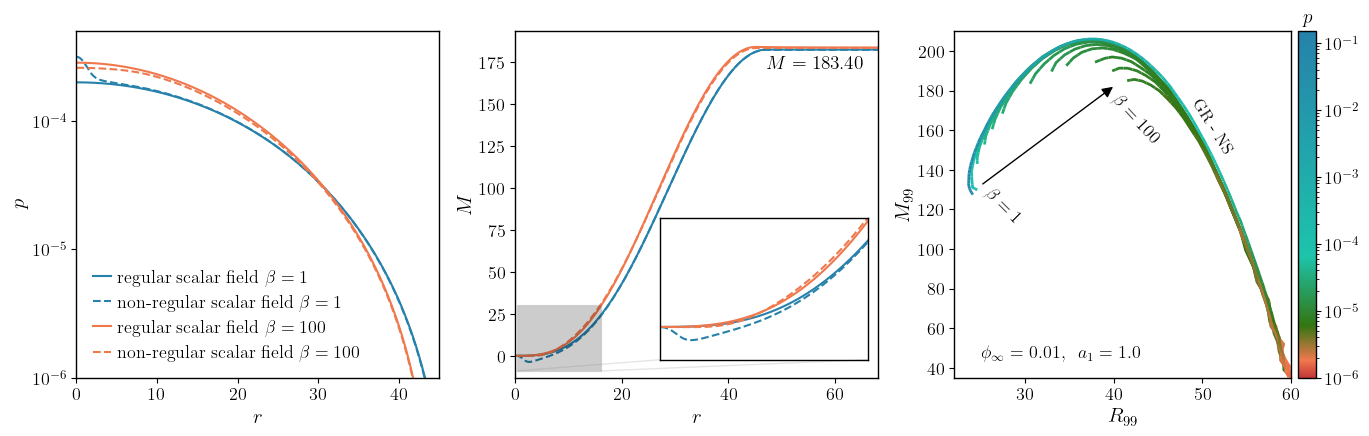

In [76]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

# creando barra de colores normalizada
cmap = LinearSegmentedColormap.from_list('', 
                                        [(0, '#c23838'),
                                         (0.05, '#f0784d'),  # (0.25, '#f0784d')
                                         (0.15, '#337512'),
                                         (0.35, '#1dc4ab'),
                                         (1, '#2681ab')], N=2000)

maxiP = max([np.max(presval_conj), np.max(massNS['p'])])
minP = min([np.min(presval_conj), np.min(massNS['p'])])
#norm = mpl.colors.Normalize(vmin=minP,
#                            vmax=maxiP)
norm = LogNorm(vmin=minP, vmax=maxiP) 
sm = ScalarMappable(norm=norm, cmap=cmap)

#################################################################
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5), sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.21))

# GR
#color = massNS['p']/maxiP
#lines = colored_line(massNS['r'], massNS['M'], color, ax[2], linewidth=2, cmap=cmap, zorder=100)

for ind, data_beta in enumerate(data_total3):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    x = np.array(data99_total3[ind])[:, 0]
    y = np.array(data99_total3[ind])[:, 1]
    color = norm(data_plot[:, 0]) # data_plot[:, 0]/maxiP
    colored_line(x, y, color, ax[2], linewidth=2, cmap=cmap, zorder=100)
#ax[2].plot(x, y, ls='--', lw=0.5, zorder=100, c='k')

# GB
for ind, data_beta in enumerate(data_total_div):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total_div[ind])[:, 0]
    y = np.array(data99_total_div[ind])[:, 1]
    color = norm(data_plot[:, 0])
    colored_line(x, y, color, ax[2], linewidth=2, cmap=cmap)

ax[0].plot([],[])

cbar = fig.colorbar(sm, fraction=0.05, pad=0.02, ax=ax[2], aspect=20, location='right',
                    ticks=[minP, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]) # , format='%3.2f'

# Función para formato "10⁶" en lugar de "1e+6"
def scientific_notation_as_power(x, pos):
    # Convert to scientific notation string
    sci_str = f"{x:e}"  # -> '2.500000e-05'
    # Split into mantissa and exponent
    mantissa_str, exponent_str = sci_str.split('e')
    mantissa = float(mantissa_str)
    exponent = int(exponent_str)
    if mantissa != 1:
        resul =  fr"${mantissa} \times 10^{{{exponent}}}$"
    else:
        resul =  fr"$10^{{{exponent}}}$"
    return resul

# Aplicar formato personalizado
cbar.ax.yaxis.set_major_formatter(FuncFormatter(scientific_notation_as_power))
cbar.ax.set_title(r'$p$', fontsize=14)

#
ax[2].text(x=25.2, y=113, s=fr'$\beta={beta_val[0]}$', fontsize=13, rotation=-45)
ax[2].text(x=39.5, y=153, s=fr'$\beta={beta_val[-1]}$', fontsize=13, rotation=-47)
ax[2].text(x=48.5, y=148, s=fr'GR - NS', fontsize=12, rotation=-58)

ax[2].annotate(" ",
            xy=(25, 132), xycoords='data',
            xytext=(40.5, 181), textcoords='data',
            arrowprops=dict(facecolor='black', arrowstyle="<|-", connectionstyle="arc3"))

ax[2].set_xlabel(r'$R_{99}$') # , fontsize=14
ax[2].set_ylabel(r'$M_{99}$')

ax[2].text(25, 45, s=r"$\phi_{\infty}=%3.2f, \;\; a_1=%2.1f$"%(a0, a1), fontsize=13)

ax[2].set_ylim(35, 210)
ax[2].set_xlim(22, 60)

############################################

indbeta2 = 0; indM2 = 44
print(beta_val[indbeta2])

ax[1].plot(data_total[indbeta2][indM2][1], data_total[indbeta2][indM2][2], c=col[2])
ax[1].plot(data_total_div[indbeta2][indM2][1], data_total_div[indbeta2][indM2][2], ls='--', c=col[2])

indbeta = -1; indM = 90
print(beta_val[indbeta])

ax[1].plot(data_total[indbeta][indM][1], data_total[indbeta][indM][2], c=col[1])
ax[1].plot(data_total_div[indbeta][indM][1], data_total_div[indbeta][indM][2], ls='--', c=col[1])


ax[1].set_xlim(0, 68)

left, bottom, width, height = [0.49, 0.15, 0.13, 0.315]
ax0 = fig.add_axes([left, bottom, width, height])

ax0.plot(data_total[indbeta2][indM2][1], data_total[indbeta2][indM2][2], c=col[2])
ax0.plot(data_total_div[indbeta2][indM2][1], data_total_div[indbeta2][indM2][2], ls='--', c=col[2])

ax0.plot(data_total[indbeta][indM][1], data_total[indbeta][indM][2], c=col[1])
ax0.plot(data_total_div[indbeta][indM][1], data_total_div[indbeta][indM][2], ls='--', c=col[1])

ax0.set_xlim(0.3, 16)
ax0.set_ylim(-9, 30)

ax0.set_xticks([])
ax0.set_yticks([])

mark_inset(ax[1], ax0, loc1=3, loc2=4, color=col[0], fc="k", alpha=0.2, ec=".5", ls='-', lw=1, zorder=2)

ax[1].text(x=47, y=171, s=r'$M=%3.2f$'%data_total[indbeta][indM][2][-1], fontsize=14)

ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$M$')

############################################
# [sol[0][0], rspan, masaP, sol, R_star]

ax[0].plot(data_total[indbeta2][indM2][1], data_total[indbeta2][indM2][3][-1], c=col[2], ls='-', label=r'regular scalar field $\beta = %d$'%beta_val[indbeta2])
ax[0].plot(data_total_div[indbeta2][indM2][1], data_total_div[indbeta2][indM2][3][-1], c=col[2], ls='--', label=r'non-regular scalar field $\beta = %d$'%beta_val[indbeta2])

ax[0].plot(data_total[indbeta][indM][1], data_total[indbeta][indM][3][-1], c=col[1], label=r'regular scalar field $\beta = %d$'%beta_val[indbeta])
ax[0].plot(data_total_div[indbeta][indM][1], data_total_div[indbeta][indM][3][-1], c=col[1], ls='--', label=r'non-regular scalar field $\beta = %d$'%beta_val[indbeta])

ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$p$')
ax[0].set_xlim(0, 45)
ax[0].set_ylim(1e-6, 5e-4)
ax[0].set_yscale('log')

ax[0].legend(loc='best', handletextpad=0.36, handlelength=1, frameon=False, fontsize=13)


1
100


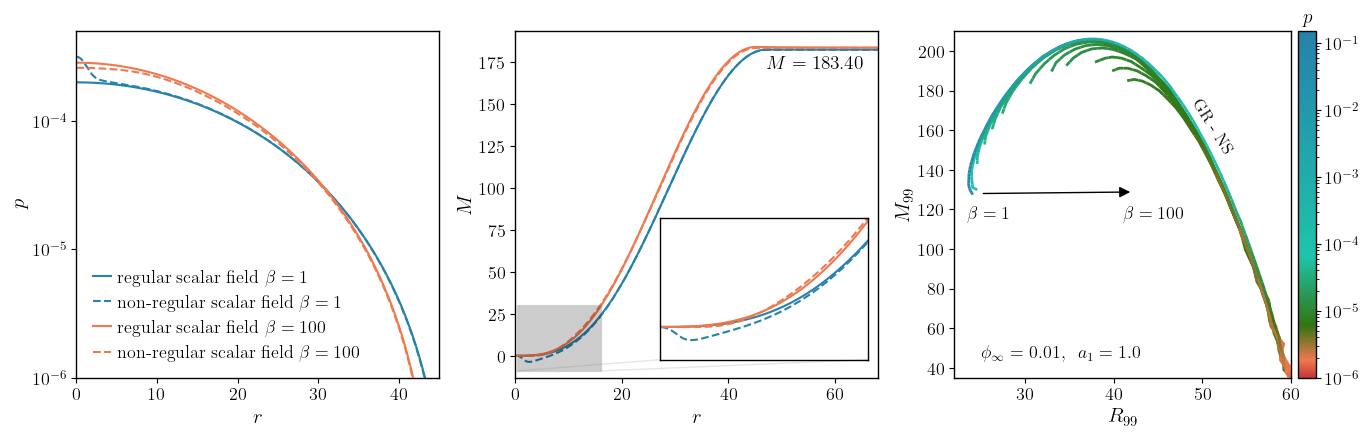

In [81]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

# creando barra de colores normalizada
cmap = LinearSegmentedColormap.from_list('', 
                                        [(0, '#c23838'),
                                         (0.05, '#f0784d'),  # (0.25, '#f0784d')
                                         (0.15, '#337512'),
                                         (0.35, '#1dc4ab'),
                                         (1, '#2681ab')], N=2000)

maxiP = max([np.max(presval_conj), np.max(massNS['p'])])
minP = min([np.min(presval_conj), np.min(massNS['p'])])
#norm = mpl.colors.Normalize(vmin=minP,
#                            vmax=maxiP)
norm = LogNorm(vmin=minP, vmax=maxiP) 
sm = ScalarMappable(norm=norm, cmap=cmap)

#################################################################
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5), sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.21))

# GR
#color = massNS['p']/maxiP
#lines = colored_line(massNS['r'], massNS['M'], color, ax[2], linewidth=2, cmap=cmap, zorder=100)

for ind, data_beta in enumerate(data_total3):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    x = np.array(data99_total3[ind])[:, 0]
    y = np.array(data99_total3[ind])[:, 1]
    color = norm(data_plot[:, 0]) # data_plot[:, 0]/maxiP
    colored_line(x, y, color, ax[2], linewidth=2, cmap=cmap, zorder=100)
#ax[2].plot(x, y, ls='--', lw=0.5, zorder=100, c='k')

# GB
for ind, data_beta in enumerate(data_total_div):
    data_plot = []
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        data_plot.append([pres0, R_star, masaP[-1]])
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total_div[ind])[:, 0]
    y = np.array(data99_total_div[ind])[:, 1]
    color = norm(data_plot[:, 0])
    colored_line(x, y, color, ax[2], linewidth=2, cmap=cmap)

ax[0].plot([],[])

cbar = fig.colorbar(sm, fraction=0.05, pad=0.02, ax=ax[2], aspect=20, location='right',
                    ticks=[minP, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]) # , format='%3.2f'

# Función para formato "10⁶" en lugar de "1e+6"
def scientific_notation_as_power(x, pos):
    # Convert to scientific notation string
    sci_str = f"{x:e}"  # -> '2.500000e-05'
    # Split into mantissa and exponent
    mantissa_str, exponent_str = sci_str.split('e')
    mantissa = float(mantissa_str)
    exponent = int(exponent_str)
    if mantissa != 1:
        resul =  fr"${mantissa} \times 10^{{{exponent}}}$"
    else:
        resul =  fr"$10^{{{exponent}}}$"
    return resul

# Aplicar formato personalizado
cbar.ax.yaxis.set_major_formatter(FuncFormatter(scientific_notation_as_power))
cbar.ax.set_title(r'$p$', fontsize=14)

#
ax[2].text(x=23.5, y=115, s=fr'$\beta={beta_val[0]}$', fontsize=13, rotation=0)
ax[2].text(x=41, y=115, s=fr'$\beta={beta_val[-1]}$', fontsize=13, rotation=0)
ax[2].text(x=48.5, y=148, s=fr'GR - NS', fontsize=12, rotation=-58)

ax[2].annotate(" ",
            xy=(25, 128), xycoords='data',
            xytext=(42.5, 126), textcoords='data',
            arrowprops=dict(facecolor='black', arrowstyle="<|-", connectionstyle="arc3"))

ax[2].set_xlabel(r'$R_{99}$') # , fontsize=14
ax[2].set_ylabel(r'$M_{99}$')

ax[2].text(25, 45, s=r"$\phi_{\infty}=%3.2f, \;\; a_1=%2.1f$"%(a0, a1), fontsize=13)

ax[2].set_ylim(35, 210)
ax[2].set_xlim(22, 60)

############################################

indbeta2 = 0; indM2 = 44
print(beta_val[indbeta2])

ax[1].plot(data_total[indbeta2][indM2][1], data_total[indbeta2][indM2][2], c=col[2])
ax[1].plot(data_total_div[indbeta2][indM2][1], data_total_div[indbeta2][indM2][2], ls='--', c=col[2])

indbeta = -1; indM = 90
print(beta_val[indbeta])

ax[1].plot(data_total[indbeta][indM][1], data_total[indbeta][indM][2], c=col[1])
ax[1].plot(data_total_div[indbeta][indM][1], data_total_div[indbeta][indM][2], ls='--', c=col[1])


ax[1].set_xlim(0, 68)

left, bottom, width, height = [0.49, 0.15, 0.13, 0.315]
ax0 = fig.add_axes([left, bottom, width, height])

ax0.plot(data_total[indbeta2][indM2][1], data_total[indbeta2][indM2][2], c=col[2])
ax0.plot(data_total_div[indbeta2][indM2][1], data_total_div[indbeta2][indM2][2], ls='--', c=col[2])

ax0.plot(data_total[indbeta][indM][1], data_total[indbeta][indM][2], c=col[1])
ax0.plot(data_total_div[indbeta][indM][1], data_total_div[indbeta][indM][2], ls='--', c=col[1])

ax0.set_xlim(0.3, 16)
ax0.set_ylim(-9, 30)

ax0.set_xticks([])
ax0.set_yticks([])

mark_inset(ax[1], ax0, loc1=3, loc2=4, color=col[0], fc="k", alpha=0.2, ec=".5", ls='-', lw=1, zorder=2)

ax[1].text(x=47, y=171, s=r'$M=%3.2f$'%data_total[indbeta][indM][2][-1], fontsize=14)

ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$M$')

############################################
# [sol[0][0], rspan, masaP, sol, R_star]

ax[0].plot(data_total[indbeta2][indM2][1], data_total[indbeta2][indM2][3][-1], c=col[2], ls='-', label=r'regular scalar field $\beta = %d$'%beta_val[indbeta2])
ax[0].plot(data_total_div[indbeta2][indM2][1], data_total_div[indbeta2][indM2][3][-1], c=col[2], ls='--', label=r'non-regular scalar field $\beta = %d$'%beta_val[indbeta2])

ax[0].plot(data_total[indbeta][indM][1], data_total[indbeta][indM][3][-1], c=col[1], label=r'regular scalar field $\beta = %d$'%beta_val[indbeta])
ax[0].plot(data_total_div[indbeta][indM][1], data_total_div[indbeta][indM][3][-1], c=col[1], ls='--', label=r'non-regular scalar field $\beta = %d$'%beta_val[indbeta])

ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$p$')
ax[0].set_xlim(0, 45)
ax[0].set_ylim(1e-6, 5e-4)
ax[0].set_yscale('log')

ax[0].legend(loc='best', handletextpad=0.36, handlelength=1, frameon=False, fontsize=13)

In [82]:
fig.savefig('barionic_non_regular_masa.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

0.0002593047858993632
0.0002841901981608688


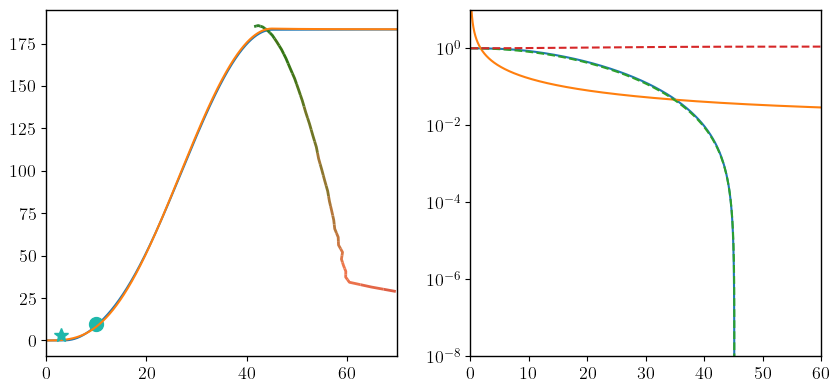

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5), sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.21))

# GB
for ind, data_beta in enumerate([data_total_div[indbeta]]):
    data_plot = []
    k=0
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        if k==indM:
            ax[0].plot(rspan, masaP)
            ax[1].plot(rspan, sol[-1]/sol[-1][0])
            ax[1].plot(rspan, sol[2])
            print(sol[-1][0])
        
        data_plot.append([pres0, R_star, masaP[-1]])
        k+=1
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total_div[indbeta])[:, 0]
    y = np.array(data99_total_div[indbeta])[:, 1]
    color = norm(data_plot[:, 0])
    colored_line(x, y, color, ax[0], linewidth=2, cmap=cmap)
    ax[0].plot([10], [10], 'o', c=cmap(color[indM]))

for ind, data_beta in enumerate([data_total[indbeta]]):
    data_plot = []
    k=0
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        if k==indM:
            ax[0].plot(rspan, masaP)
            ax[1].plot(rspan, sol[-1]/sol[-1][0], ls='--')
            ax[1].plot(rspan, sol[2]/sol[2][0], ls='--')
            print(sol[-1][0])
        
        data_plot.append([pres0, R_star, masaP[-1]])
        k+=1
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total[indbeta])[:, 0]
    y = np.array(data99_total[indbeta])[:, 1]
    color = norm(data_plot[:, 0])
    #colored_line(x, y, color, ax[0], linewidth=2, cmap=cmap)
    ax[0].plot([3], [3], '*', c=cmap(color[indM]))

ax[0].plot([], [])
ax[0].set_xlim(0, 70)
ax[1].set_xlim(0, 60)
ax[1].set_ylim(1e-8, 10)
ax[1].set_yscale('log')

0.0003155915947799042
0.00019974917948408516


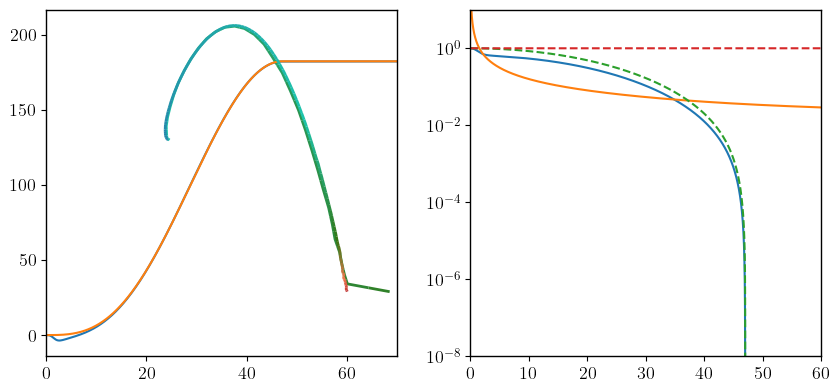

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5), sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.21))

# GB
for ind, data_beta in enumerate([data_total_div[indbeta2]]):
    data_plot = []
    k=0
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        if k==indM2:
            ax[0].plot(rspan, masaP)
            ax[1].plot(rspan, sol[-1]/sol[-1][0])
            ax[1].plot(rspan, sol[2])
            print(sol[-1][0])
        
        data_plot.append([pres0, R_star, masaP[-1]])
        k+=1
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total_div[indbeta2])[:, 0]
    y = np.array(data99_total_div[indbeta2])[:, 1]
    color = norm(data_plot[:, 0])
    colored_line(x, y, color, ax[0], linewidth=2, cmap=cmap)


for ind, data_beta in enumerate([data_total[indbeta2]]):
    data_plot = []
    k=0
    for dat in data_beta:
        pres0, rspan, masaP, sol, R_star = dat
        if k==indM2:
            ax[0].plot(rspan, masaP)
            ax[1].plot(rspan, sol[-1]/sol[-1][0], ls='--')
            ax[1].plot(rspan, sol[2]/sol[2][0], ls='--')
            print(sol[-1][0])
        
        data_plot.append([pres0, R_star, masaP[-1]])
        k+=1
    data_plot = np.array(data_plot)

    #x = data_plot[:, 1]
    #y = data_plot[:, 2]
    x = np.array(data99_total[indbeta2])[:, 0]
    y = np.array(data99_total[indbeta2])[:, 1]
    color = norm(data_plot[:, 0])
    colored_line(x, y, color, ax[0], linewidth=2, cmap=cmap)

ax[0].plot([], [])
ax[0].set_xlim(0, 70)
ax[1].set_xlim(0, 60)
ax[1].set_ylim(1e-8, 10)
ax[1].set_yscale('log')

### Objetos Fisicos

In [85]:
def expon(num):
    ind = None
    for i in range(len(num)-1, -1, -1):

        if num[i]=='E':
            ind = i+1
            break
   
    if num[ind]=='+':
        ind +=1
    
    return num[ind:]

In [86]:
# Función para formato "10⁶" en lugar de "1e+6"
def scientific_notation_as_power(x, pos):
    # Convert to scientific notation string
    sci_str = f"{x:e}"  # -> '2.500000e-05'
    # Split into mantissa and exponent
    mantissa_str, exponent_str = sci_str.split('e')
    mantissa = float(mantissa_str)
    exponent = int(exponent_str)
    if mantissa != 1:
        resul =  fr"${mantissa} \times 10^{{{exponent}}}$"
    else:
        resul =  fr"$10^{{{exponent}}}$"
    return resul

from matplotlib.ticker import FuncFormatter

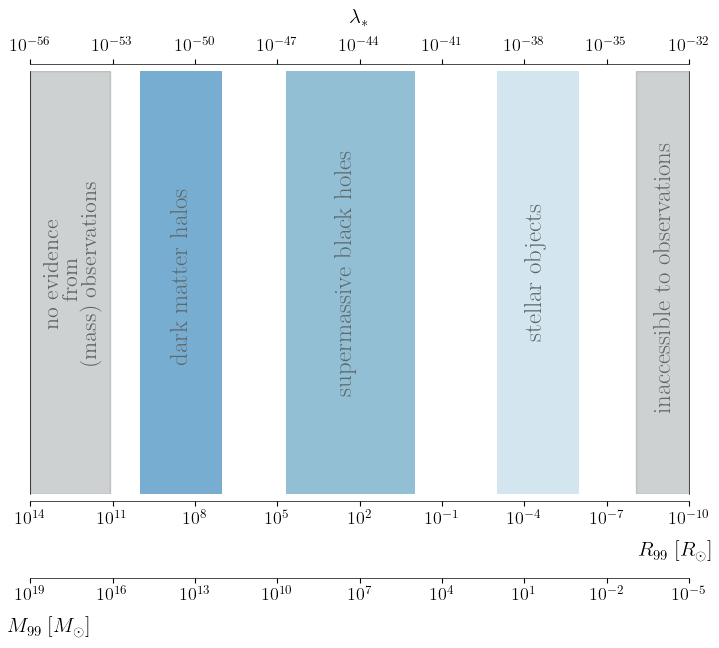

In [87]:
from decimal import Decimal

Rs = 696340e03 # m/RS
# conversiones
masConv = lambda mb, lam: 1.09402e-38 * mb / lam  # solar mass
radiConv = lambda rb, lam: 1.61658e-35 * rb / lam  # metter

# valores para lam
lamv = np.logspace(-56, -32, 100)
lamvAxs = np.array([1e-56, 1e-53, 1e-50, 1e-47, 1e-44, 1e-41, 1e-38, 1e-35, 1e-32])
mb, rb = 10, 100

####
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8.5, 5.5), sharex=False, sharey=False)

ax.loglog(lamv, lamv, ls='')
ax.set_xticks(lamvAxs)
ax.set_xlim(lamvAxs[0], lamvAxs[-1])

#
ax0= ax.twiny()
ax0.loglog(lamv, masConv(mb, lamv), ls='')

ax0.spines['bottom'].set_position(('outward', 60))  # Desplazar hacia abajo
ax0.xaxis.set_ticks_position('bottom')
ax0.xaxis.set_label_position('bottom')

ax0.set_xticks(lamvAxs)
yticks = masConv(mb, lamvAxs)
decim = [F'{Decimal(i):.2E}' for i in yticks] # "${}$".format(round(i))
new_labels =['$10^{}$'.format({int(expon(i))}) for i in decim]
ax0.set_xticklabels(new_labels)
ax0.set_xlabel(r'$M_{99}\; [M_{\odot}]$', fontdict=None, labelpad=10, loc='center')
ax0.set_xlim(lamvAxs[0], lamvAxs[-1])

ax1= ax.twiny()
ax1.loglog(lamv, radiConv(rb, lamv)/Rs, ls='')

ax1.spines['bottom'].set_position(('outward', 5))  # Desplazar hacia abajo
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_label_position('bottom')

ax1.set_xticks(lamvAxs)
yticks = radiConv(rb, lamvAxs)/Rs
decim = [F'{Decimal(i):.2E}' for i in yticks] # "${}$".format(round(i))
new_labels =['$10^{}$'.format({int(expon(i))}) for i in decim]
ax1.set_xticklabels(new_labels)

ax1.set_xlabel(r'$R_{99}\; [R_{\odot}]$', fontdict=None, labelpad=10, loc='center')
ax1.set_xlim(lamvAxs[0], lamvAxs[-1])

####
ax.xaxis.set_ticks_position('top')  # ticks arriba
ax.xaxis.set_label_position('top')  # etiqueta del eje arriba
ax.spines['top'].set_position(('outward', 5))  # Desplazar hacia abajo

ax.set_xlabel(r'$\lambda_{*}$', fontdict=None, labelpad=10)
ax.spines['bottom'].set_visible(False)   # Oculta la línea del eje (spine)
#ax.set_yticks([])

###### Regiones

######
temp = masConv(mb, lamv) 
ind = lamv[temp > 1e16]
ax.axvspan(xmin=ind[0], xmax=ind[-1], ymin=0, ymax=1, color='#5f6769', alpha=0.3)

ax.text(1e-55, 2e-28, r'no evidence', {'color': '#5f6769', 'fontsize': 16},
            rotation=90, rotation_mode='anchor')
ax.text(5e-55, 5e-23, r'from ', {'color': '#5f6769', 'fontsize': 16},
            rotation=90, rotation_mode='anchor')
ax.text(2.5e-54, 2e-35, r'(mass) observations', {'color': '#5f6769', 'fontsize': 16},
            rotation=90, rotation_mode='anchor')


###

temp = masConv(mb, lamv) 
ind = lamv[temp < 1e-3]
ax.axvspan(xmin=ind[0], xmax=ind[-1], ymin=0, ymax=1, color='#5f6769', alpha=0.3)


ax.text(2e-33, 1e-44, r'inaccessible to observations', {'color': '#5f6769', 'fontsize': 18},
            rotation=90, rotation_mode='anchor')
#ax.text(5e-33, 1e-25, r'observations', {'color': '#5f6769', 'fontsize': 16},
#            rotation=90, rotation_mode='anchor')

####
ax.axvspan(1e-36, 1e-39, ymin=0, ymax=1, facecolor='#2681ab', alpha=.2) #, hatch='.'

ax.text(4.e-38, 1e-30, r'stellar objects', {'color': '#5f6769', 'fontsize': 18},
            rotation=90, rotation_mode='anchor')#\Lambda_{3}\sim

####
ax.axvspan(2e-47, 1e-42, ymin=0, ymax=1, facecolor='#2681ab', alpha=0.5) #, hatch='.'

ax.text(5e-45, 2e-41, r'supermassive black holes', {'color': '#5f6769', 'fontsize': 18},
            rotation=90, rotation_mode='anchor')

####
ax.axvspan(xmin=1e-52, xmax=1e-49, ymin=0, ymax=1, alpha=0.6)

ax.text(5e-51, 2e-35, r'dark matter halos', {'color': '#5f6769', 'fontsize': 18},
            rotation=90, rotation_mode='anchor')

###
ax.set_yticks([])

for axes in [ax0, ax1]:
    axes.spines['top'].set_visible(False)
    axes.spines['left'].set_visible(False)
    axes.spines['right'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)


ax1.xaxis.label.set_position((.98, -0.1))  # (x, y) en coordenadas del eje (0–1)
ax0.xaxis.label.set_position((0.03, -0.1))

for spine, spine0, spine1 in zip(ax.spines.values(), ax0.spines.values(), ax1.spines.values()):
    spine.set_linewidth(0.5)
    spine0.set_linewidth(0.5)
    spine1.set_linewidth(0.5)

    
#y = np.linspace(0, 1, 500)
#x = 1e-40 * np.sin(20 * y)
#ax.plot(x, y)

In [88]:
fig.savefig('physical_regions.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [89]:
# used data
edo = lambda p: EDO(p, [100, 2])
edoc = lambda p: EDOcte(p, 0.04)

beta_val = [5e03] # [1.0, 2.0, 5.0, 10.0, 20.0, 50.0]

zeroP_val = 1e-32
scalar0 = 0.5
presval = np.linspace(1e-17, 4.6e-07, 25)#np.linspace(1e-12, 1.04e-05, 50)

data_total = []
for beta in beta_val:
    data = []
    print('===> ', beta, '\n')
    for pres0 in presval:
        n0, g0, p0, dn0, dp0 = 1, 1, scalar0, 0, 0
        V0 = [n0, g0, p0, dn0, dp0, pres0]
        try:
            #print(pres0)
            rspan, sol, R_star = eq.main_NDsolverEGBHstars(beta, edo, V0=V0, argB=None, c1=1, Nptos=100000, rmin=1e-4, rmax=1e4, 
            met='LSODA', Rtol=1e-15, Atol=1e-15, zeroP_val=zeroP_val*pres0)  # LSODA RK45
            masaP = 8*np.pi * eq.masaADMProf(rspan, sol[1])
            data.append([pres0, rspan, masaP, sol, R_star])
        except Exception as e:
            print(f"Error solving for beta={beta}, pres0={pres0}: {e}")
            break
    data_total.append(data)

# Masa 99
def find_nearest(array, value):
    n = [abs(i-value) for i in array]
    idx = n.index(min(n))
    return (array[idx], idx)

data99_total = []
for data_beta in data_total:
    data99 = []
    for data in data_beta:
        pres0, rspan, masaP, sol, R_star = data
        mas = masaP[-1]
        valM, indx = find_nearest(masaP, 0.99*mas)
        R99, M99 = rspan[indx], masaP[indx]
        print(0.99*mas, valM, ' -> ', R99, M99)
        data99.append([R99, M99])
    data99_total.append(data99)
data99_total = np.array(data99_total, dtype=object)

===>  5000.0 

Solving from interior
Radio =====>   62.83186639824614
Solving from interior


/Users/armandoroqueestrada/anaconda3/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


Radio =====>   62.506540846952745
Solving from interior
Radio =====>   62.32316624234339
Solving from interior
Radio =====>   62.16289838000903
Solving from interior
Radio =====>   62.01468683038885
Solving from interior
Radio =====>   61.87396352701425
Solving from interior
Radio =====>   61.7384645642149
Solving from interior
Radio =====>   61.60700480633301
Solving from interior
Radio =====>   61.478615887987345
Solving from interior
Radio =====>   61.35272201433924
Solving from interior
Radio =====>   61.22894531880408
Solving from interior
Radio =====>   61.10696722038946
Solving from interior
Radio =====>   60.98658972707854
Solving from interior
Radio =====>   60.8676423187781
Solving from interior
Radio =====>   60.75001692939259
Solving from interior
Radio =====>   60.63378439519289
Solving from interior
Radio =====>   60.51885484459101
Solving from interior
Radio =====>   60.405294683641294
Solving from interior
Radio =====>   60.29323312048258
Solving from interior
Radio ===

In [90]:
R99

55.500654450544516

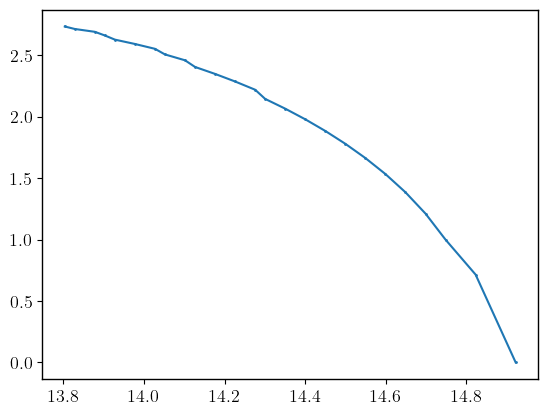

In [91]:
# GB
lam = 0.65e-37 #1e-37
masConv = lambda mb, lam: 1.09402e-38 * mb / lam  # solar mass
radiConv = lambda rb, lam: 1.61658e-35 * rb / lam  # metter
for ind in range(len(data99_total)):
     x = np.array(data99_total[ind])[:, 0]
     y = np.array(data99_total[ind])[:, 1]
     #plt.plot(x, y, marker='o', markersize=1)
     plt.plot(radiConv(x, lam)*1e-03, masConv(y, lam), marker='o', markersize=1)

In [92]:
ObservNeutronStart = {'X-Ray/Optical Binaries':
{
'4U1700-377': {'mass': 1.96, 'error': 0.19}, 'Vela X-1': {'mass': 2.12, 'error': 0.16}, 'Cyg X-2': {'mass': 1.71, 'error': 0.21},
'4U1538-522': {'mass': 1.02, 'error': 0.17}, 'SMC X-1': {'mass': 1.21, 'error': 0.12}, 'LMC X-4': {'mass': 1.57, 'error': 0.11},
'Cen X-3': {'mass': 1.57, 'error': 0.16}, 'Her X-1': {'mass': 1.073, 'error': 0.173}, 'XTE J2123-058': {'mass': 1.53, 'error': 0.30},
'2S 0921-630': {'mass': 1.44, 'error': 0.1}, '4U 1822-371': {'mass': 1.96, 'error': 0.35}, 'EXO 1722-363': {'mass': 1.91, 'error': 0.45},
'B1957+20': {'mass': 2.39, 'error': 0.29}, 'SAX J1802.7-2017': {'mass': 1.57, 'error': 0.25}, 'OAO 1657-415': {'mass': 1.74, 'error': 0.30},
'J1311-3430': {'mass': 2.56, 'error': 0.52}, 'J01326.7+303228': {'mass': 2.0, 'error': 0.4}, 'XTE J1855-026': {'mass': 1.41, 'error': 0.24}
},
'NS-NS Binaries':
{
'J1453+1559': {'mass': 1.559, 'error': 0.004, 'companion': {'mass': 1.174, 'error': 0.004}},
'J1906+0746': {'mass': 1.291, 'error': 0.011, 'companion': {'mass': 1.322, 'error': 0.011}},
'B1534+12': {'mass': 1.3332, 'error': 0.0010, 'companion': {'mass': 1.3452, 'error': 0.0010}},
'B1913+16': {'mass': 1.4398, 'error': 0.0002, 'companion': {'mass': 1.3886, 'error': 0.0002}},
'B2127+11C': {'mass': 1.358, 'error': 0.010, 'companion': {'mass': 1.354, 'error': 0.010}},
'J0737-3039A': {'mass': 1.3381, 'error': 0.0007, 'companion': {'mass': 1.2489, 'error': 0.0007}},
'J1756-2251': {'mass': 1.312, 'error': 0.017, 'companion': {'mass': 1.258, 'error': 0.017}},
'J1807-2500B': {'mass': 1.3655, 'error': 0.0021, 'companion': {'mass': 1.2064, 'error': 0.0020}},
},
'NS-WD':
{
'B2303+46': {'mass': 1.38, 'error': 0.06},  'J1012+5307': {'mass': 1.83, 'error': 0.11}, 'J1713+0747': {'mass': 1.31, 'error': 0.11}, 
'B1802-07': {'mass': 1.26, 'error': 0.08}, 'B1855+09': {'mass': 1.30, 'error': 0.10}, 'J0621+1002': {'mass': 1.53, 'error': 0.10},
'J0751+1807': {'mass': 1.72, 'error': 0.07}, 'J0437-4715': {'mass': 1.44, 'error': 0.07}, 'J1141-6545': {'mass': 1.27, 'error': 0.01},
'J1748-2446I': {'mass': 1.91, 'error': 0.10}, 'J1748-2446J': {'mass': 1.79, 'error': 0.10}, 'J1909-3744': {'mass': 1.55, 'error': 0.03},
'J0024-7204H': {'mass': 1.48, 'error': 0.03}, 'B1802-2124': {'mass': 1.24, 'error': 0.11}, 'J0514-4002A': {'mass': 1.49, 'error': 0.04},
'B1516+02B': {'mass': 2.08, 'error': 0.19}, 'J1748-2021B': {'mass': 2.74, 'error': 0.21},  'J1750-37A': {'mass': 1.26, 'error': 0.36},
'J1738+0333': {'mass': 1.47, 'error': 0.06}, 'B1911-5958A': {'mass': 1.34, 'error': 0.08}, 'J1614-2230': {'mass': 1.928, 'error': 0.017},
'J2043+1711': {'mass': 1.41, 'error': 0.18}, 'J0348+0432': {'mass': 2.01, 'error': 0.04},  'J0337+1715': {'mass': 1.4378, 'error': 0.0013},
'J2222-0137': {'mass': 1.20, 'error': 0.14}, 'J1946+2417': {'mass': 1.832, 'error': 0.028}, 'J2234+0611': {'mass': 1.393, 'error': 0.013},
'J1918-0642': {'mass': 1.18, 'error': 0.09}, 'J1949+3106': {'mass': 1.47, 'error': 0.31}
},
'NS-MainSequenceBinaries':
{
'J0045-7319': {'mass': 1.58, 'error': 0.34},
'J1903+0327': {'mass': 1.667, 'error': 0.021},
'J1023+0038': {'mass': 1.71, 'error': 0.16}
}
}

In [93]:
lam

6.5e-38

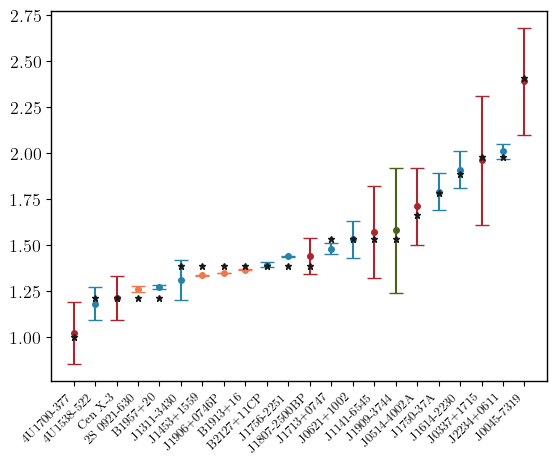

In [94]:
def find_nearest(array, value):
    n = [abs(i-value) for i in array]
    idx = n.index(min(n))
    return (array[idx], idx)

# Extraer datos
datatype, xnameXR, ymasaXR, yerrXR = [], [], [], []

# Diccionario de categorías que queremos recorrer
for category, entries in ObservNeutronStart.items():
    for name, data in entries.items():
        # Primera estrella de neutrones
        datatype.append(category)
        xnameXR.append(name)
        ymasaXR.append(data['mass'])
        yerrXR.append(data['error'])

        # Agregar compañero si existe (solo en NS-NS Binaries, por ejemplo)
        if 'companion' in data:
            companion = data['companion']
            datatype.append(category)
            xnameXR.append(name + 'P')
            ymasaXR.append(companion['mass'])
            yerrXR.append(companion['error'])

# Convertir a numpy arrays
datatype = np.array(datatype)
xnameXR = np.array(xnameXR)
ymasaXR = np.array(ymasaXR)
yerrXR = np.array(yerrXR)

# Ordenando
ind = np.argsort(ymasaXR)
ymasaXRSort = ymasaXR[ind]
xnameXRSort = xnameXR[ind]
yerrXRSort = yerrXR[ind]
datatype = datatype[ind]

xdataXR = np.arange(len(ymasaXRSort))

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

colordict = {'X-Ray/Optical Binaries': '#ab262f', 'NS-NS Binaries': '#f0784d', 'NS-WD': '#2681ab', 'NS-MainSequenceBinaries': '#486318'}
jump = 3
ydata2 = masConv(y, lam)
for i, xdat in enumerate(xdataXR[::jump]):
    ydat = ymasaXRSort[::jump][i]
    yerr = yerrXRSort[::jump][i]
    color = colordict[datatype[::jump][i]]
    ydata2Val, _ = find_nearest(ydata2, ydat)
    plt.errorbar(xdat, ydat, yerr=yerr, fmt='o', markersize=4, capsize=5, color=color)
    plt.plot(xdat, ydata2Val, marker='*', markersize=5, color=col[0], zorder=100)

plt.xticks(ticks=xdataXR[::jump], labels=xnameXR[::jump], rotation=45, ha='right', fontsize=9);



6.5e-38


Text(4.0, 1.88, '$\\phi_0=0.5$')

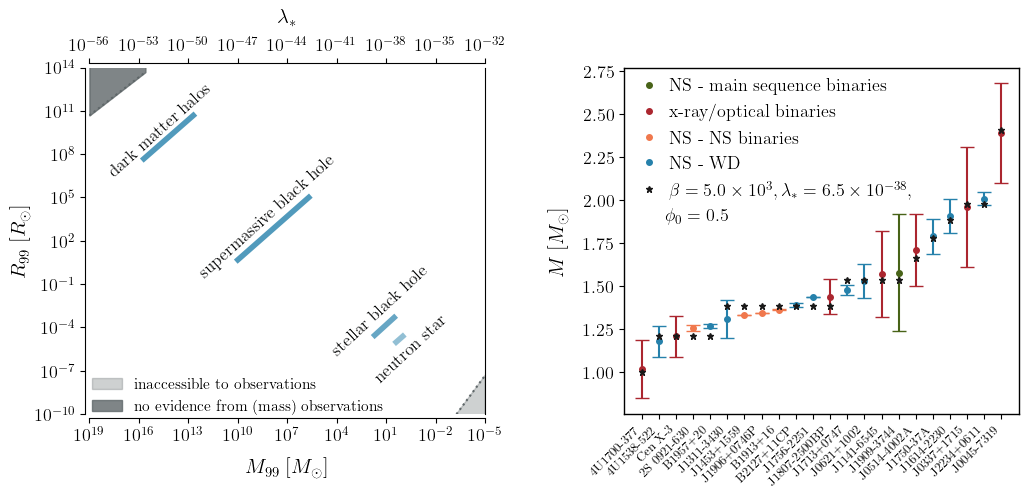

In [96]:
from decimal import Decimal

Rs = 696340e03 # m/RS
# conversiones
masConv = lambda mb, lam: 1.09402e-38 * mb / lam  # solar mass
radiConv = lambda rb, lam: 1.61658e-35 * rb / lam  # metter

# valores para lam
lamv = np.logspace(-56, -32, 100)
lamvAxs = np.array([1e-56, 1e-53, 1e-50, 1e-47, 1e-44, 1e-41, 1e-38, 1e-35, 1e-32])
mb, rb = 37.81, 90 #15.31, 90

####
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4.5),
                       gridspec_kw=dict(hspace=0.1, wspace=.35), sharex=False, sharey=False)

#ax[0].loglog(lamv, lamv, ls='')
ax[0].loglog(lamv, radiConv(rb, lamv)/Rs, ls='')


####
ax0 = ax[0].twiny()
ax0.loglog(lamv, masConv(mb, lamv), ls='')

ax0.spines['bottom'].set_position(('outward', 3))  # Desplazar hacia abajo
ax0.xaxis.set_ticks_position('bottom')
ax0.xaxis.set_label_position('bottom')

ax0.set_xticks(lamvAxs)
yticks = masConv(mb, lamvAxs)
decim = [F'{Decimal(i):.2E}' for i in yticks] # "${}$".format(round(i))
new_labels =['$10^{}$'.format({int(expon(i))}) for i in decim]
ax0.set_xticklabels(new_labels)
ax0.set_xlabel(r'$M_{99}\; [M_{\odot}]$', fontdict=None, labelpad=10, loc='center')
ax0.set_xlim(lamvAxs[0], lamvAxs[-1])

###############
ax[0].set_xticks(lamvAxs)
ax[0].set_xlim(lamvAxs[0], lamvAxs[-1])

ax[0].set_xlabel(r'$\lambda_{*}$', fontdict=None, labelpad=10)
ax[0].spines['bottom'].set_visible(False)   # Oculta la línea del eje (spine)

ax[0].xaxis.set_ticks_position('top')  # ticks arriba
ax[0].xaxis.set_label_position('top')  # etiqueta del eje arriba
ax[0].spines['top'].set_position(('outward', 3))  # Desplazar hacia abajo


yticks = radiConv(rb, lamvAxs)/Rs
ax[0].set_yticks(yticks)
ax[0].set_ylim(yticks[-1], yticks[0])

decim = [F'{Decimal(i):.2E}' for i in yticks] # "${}$".format(round(i))
new_labels =['$10^{}$'.format({int(expon(i))}) for i in decim]
ax[0].set_yticklabels(new_labels)

ax[0].set_ylabel(r'$R_{99}\; [R_{\odot}]$', fontdict=None, loc='center')
#ax[0].spines['left'].set_visible(False)
#ax[0].spines['right'].set_visible(False)

#ax[0].yaxis.set_ticks_position('right')
#ax[0].yaxis.set_label_position('right') 
#ax[0].spines['right'].set_position(('outward', 3))
ax[0].spines['left'].set_position(('outward', 3))

################
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)


for spine, spine0 in zip(ax[0].spines.values(), ax0.spines.values()):
    spine.set_linewidth(0.8)
    spine0.set_linewidth(0.8)



################

temp = masConv(mb, lamv) 
ind = lamv[temp < 5e-3]
lamv_i = [ind[0], ind[-1]]
yrad = [1e-10, 1e-7]

ax[0].plot(lamv_i, yrad, color='#5f6769', ls=':', alpha=1)

ax[0].fill_between(lamv_i, yrad, 0,
                 facecolor='#5f6769', # The fill color
                 color='#5f6769',       # The outline color
                 alpha=0.3,   # Transparency of the fill
                 label=r'inaccessible to observations')

### neutron star
lamv_ns = [4e-38, 1e-37]
yrad_ns = [2e-5, 5e-5]
ax[0].plot(lamv_ns, yrad_ns, lw=4, color='#2681ab', alpha=.5)

ax[0].text(4.e-39, 3e-8, r'neutron star', {'color': "#050606", 'fontsize': 12.5},
            rotation=43, rotation_mode='anchor')


### stellar black hole
lamv_sbh = [3e-38, 2e-39]
yrad_sbh = [1e-3, 6e-5]
ax[0].plot(lamv_sbh, yrad_sbh, lw=4, color='#2681ab', alpha=.7)
ax[0].text(1.e-41, 2e-6, r'stellar black hole', {'color': "#050606", 'fontsize': 12.5},
            rotation=43, rotation_mode='anchor')


### supermassive black hole
lamv_smbh = [2e-43, 1e-47]
yrad_smbh = [208938, 10]
ax[0].plot(lamv_smbh, yrad_smbh, lw=4, color='#2681ab', alpha=.8)
ax[0].text(1.e-49, 5e-1, r'supermassive black hole', {'color': "#050606", 'fontsize': 12.5},
            rotation=42, rotation_mode='anchor')

### dark matter halos
lamv_dmh = [2e-50, 2e-53]
yrad_dmh = [1e11, 1e08]
ax[0].plot(lamv_dmh, yrad_dmh, lw=4, color='#2681ab', alpha=.8)
ax[0].text(3.e-55, 5e6, r'dark matter halos', {'color': "#050606", 'fontsize': 12.5},
            rotation=42, rotation_mode='anchor')

###############
temp = masConv(mb, lamv) 
ind = lamv[temp > 1e16]
lamv_i = [ind[0], ind[-1]]
yrad = [1e11, 1e14]

ax[0].plot(lamv_i, yrad, color='#5f6769', ls=':', alpha=1)

ax[0].fill_between(lamv_i, yrad, 1e20,
                 facecolor='#5f6769', # The fill color
                 color='#5f6769',       # The outline color
                 alpha=0.8,
                 label=r'no evidence from (mass) observations')  

ax[0].legend(loc=(-0.01, -0.02), frameon=False, fontsize=11.)

##############
print(lam)
jump = 3
ydata2 = masConv(y, lam)
for i, xdat in enumerate(xdataXR[::jump]):
    ydat = ymasaXRSort[::jump][i]
    yerr = yerrXRSort[::jump][i]
    color = colordict[datatype[::jump][i]]
    ydata2Val, _ = find_nearest(ydata2, ydat)
    ax[1].errorbar(xdat, ydat, yerr=yerr, fmt='o', markersize=4, capsize=5, color=color)
    ax[1].plot(xdat, ydata2Val, marker='*', markersize=5, color=col[0], zorder=100)

ax[1].set_xticks(ticks=xdataXR[::jump], labels=xnameXR[::jump], rotation=45, ha='right', fontsize=9)
ax[1].set_ylabel(r'$M\; [M_{\odot}]$', fontdict=None, labelpad=10, loc='center')

colordict = {'X-Ray/Optical Binaries': '#ab262f', 'NS-NS Binaries': '#f0784d', 'NS-WD': '#2681ab', 'NS-MainSequenceBinaries': '#486318'}

ax[1].plot([], [], ls='', marker='o', markersize=4, color=colordict['NS-MainSequenceBinaries'], label=r'NS - main sequence binaries')
ax[1].plot([], [], ls='', marker='o', markersize=4, color=colordict['X-Ray/Optical Binaries'], label=r'x-ray/optical binaries')
ax[1].plot([], [], ls='', marker='o', markersize=4, color=colordict['NS-NS Binaries'], label=r'NS - NS binaries')
ax[1].plot([], [], ls='', marker='o', markersize=4, color=colordict['NS-WD'], label=r'NS - WD')


mantissa1, exponent1 = f"{beta_val[0]:.1e}".split("e")
mantissa2, exponent2 = f"{lam:.1e}".split("e")
exponent1 = int(exponent1)  # convertir a entero para quitar el +0 formato
exponent2 = int(exponent2)
ax[1].plot([], [], ls='', marker='*', markersize=5, color=col[0],
           label=fr'$\beta = {mantissa1} \times 10^{{{exponent1}}},\lambda_{{*}}={mantissa2} \times 10^{{{exponent2}}}$,')

ax[1].legend(loc=(0, 0.6), frameon=False, fontsize=13, handletextpad=0.1)
ax[1].text(x=4., y=1.88, s=r'$\phi_0=%2.1f$'%scalar0, fontsize=13)

In [97]:
fig.savefig('physical_regions.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

6.5e-38


Text(4.0, 1.88, '$\\phi_0=0.5$')

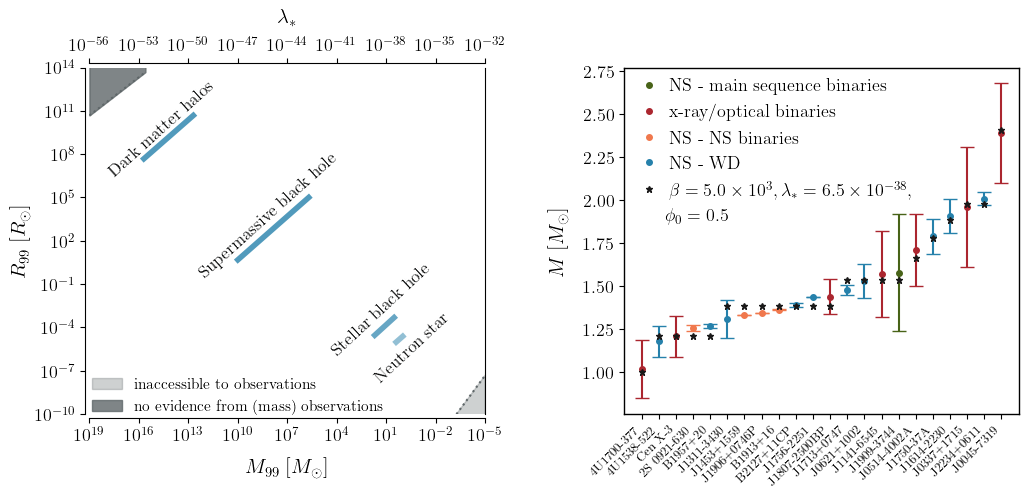

In [98]:
from decimal import Decimal

Rs = 696340e03 # m/RS
# conversiones
masConv = lambda mb, lam: 1.09402e-38 * mb / lam  # solar mass
radiConv = lambda rb, lam: 1.61658e-35 * rb / lam  # metter

# valores para lam
lamv = np.logspace(-56, -32, 100)
lamvAxs = np.array([1e-56, 1e-53, 1e-50, 1e-47, 1e-44, 1e-41, 1e-38, 1e-35, 1e-32])
mb, rb = 37.81, 90 #15.31, 90

####
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4.5),
                       gridspec_kw=dict(hspace=0.1, wspace=.35), sharex=False, sharey=False)

#ax[0].loglog(lamv, lamv, ls='')
ax[0].loglog(lamv, radiConv(rb, lamv)/Rs, ls='')


####
ax0 = ax[0].twiny()
ax0.loglog(lamv, masConv(mb, lamv), ls='')

ax0.spines['bottom'].set_position(('outward', 3))  # Desplazar hacia abajo
ax0.xaxis.set_ticks_position('bottom')
ax0.xaxis.set_label_position('bottom')

ax0.set_xticks(lamvAxs)
yticks = masConv(mb, lamvAxs)
decim = [F'{Decimal(i):.2E}' for i in yticks] # "${}$".format(round(i))
new_labels =['$10^{}$'.format({int(expon(i))}) for i in decim]
ax0.set_xticklabels(new_labels)
ax0.set_xlabel(r'$M_{99}\; [M_{\odot}]$', fontdict=None, labelpad=10, loc='center')
ax0.set_xlim(lamvAxs[0], lamvAxs[-1])

###############
ax[0].set_xticks(lamvAxs)
ax[0].set_xlim(lamvAxs[0], lamvAxs[-1])

ax[0].set_xlabel(r'$\lambda_{*}$', fontdict=None, labelpad=10)
ax[0].spines['bottom'].set_visible(False)   # Oculta la línea del eje (spine)

ax[0].xaxis.set_ticks_position('top')  # ticks arriba
ax[0].xaxis.set_label_position('top')  # etiqueta del eje arriba
ax[0].spines['top'].set_position(('outward', 3))  # Desplazar hacia abajo


yticks = radiConv(rb, lamvAxs)/Rs
ax[0].set_yticks(yticks)
ax[0].set_ylim(yticks[-1], yticks[0])

decim = [F'{Decimal(i):.2E}' for i in yticks] # "${}$".format(round(i))
new_labels =['$10^{}$'.format({int(expon(i))}) for i in decim]
ax[0].set_yticklabels(new_labels)

ax[0].set_ylabel(r'$R_{99}\; [R_{\odot}]$', fontdict=None, loc='center')
#ax[0].spines['left'].set_visible(False)
#ax[0].spines['right'].set_visible(False)

#ax[0].yaxis.set_ticks_position('right')
#ax[0].yaxis.set_label_position('right') 
#ax[0].spines['right'].set_position(('outward', 3))
ax[0].spines['left'].set_position(('outward', 3))

################
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)


for spine, spine0 in zip(ax[0].spines.values(), ax0.spines.values()):
    spine.set_linewidth(0.8)
    spine0.set_linewidth(0.8)



################

temp = masConv(mb, lamv) 
ind = lamv[temp < 5e-3]
lamv_i = [ind[0], ind[-1]]
yrad = [1e-10, 1e-7]

ax[0].plot(lamv_i, yrad, color='#5f6769', ls=':', alpha=1)

ax[0].fill_between(lamv_i, yrad, 0,
                 facecolor='#5f6769', # The fill color
                 color='#5f6769',       # The outline color
                 alpha=0.3,   # Transparency of the fill
                 label=r'inaccessible to observations')

### neutron star
lamv_ns = [4e-38, 1e-37]
yrad_ns = [2e-5, 5e-5]
ax[0].plot(lamv_ns, yrad_ns, lw=4, color='#2681ab', alpha=.5)

ax[0].text(4.e-39, 3e-8, r'Neutron star', {'color': "#050606", 'fontsize': 12.5},
            rotation=43, rotation_mode='anchor')


### stellar black hole
lamv_sbh = [3e-38, 2e-39]
yrad_sbh = [1e-3, 6e-5]
ax[0].plot(lamv_sbh, yrad_sbh, lw=4, color='#2681ab', alpha=.7)
ax[0].text(1.e-41, 2e-6, r'Stellar black hole', {'color': "#050606", 'fontsize': 12.5},
            rotation=43, rotation_mode='anchor')


### supermassive black hole
lamv_smbh = [2e-43, 1e-47]
yrad_smbh = [208938, 10]
ax[0].plot(lamv_smbh, yrad_smbh, lw=4, color='#2681ab', alpha=.8)
ax[0].text(1.e-49, 5e-1, r'Supermassive black hole', {'color': "#050606", 'fontsize': 12.5},
            rotation=42, rotation_mode='anchor')

### dark matter halos
lamv_dmh = [2e-50, 2e-53]
yrad_dmh = [1e11, 1e08]
ax[0].plot(lamv_dmh, yrad_dmh, lw=4, color='#2681ab', alpha=.8)
ax[0].text(3.e-55, 5e6, r'Dark matter halos', {'color': "#050606", 'fontsize': 12.5},
            rotation=42, rotation_mode='anchor')

###############
temp = masConv(mb, lamv) 
ind = lamv[temp > 1e16]
lamv_i = [ind[0], ind[-1]]
yrad = [1e11, 1e14]

ax[0].plot(lamv_i, yrad, color='#5f6769', ls=':', alpha=1)

ax[0].fill_between(lamv_i, yrad, 1e20,
                 facecolor='#5f6769', # The fill color
                 color='#5f6769',       # The outline color
                 alpha=0.8,
                 label=r'no evidence from (mass) observations')  

ax[0].legend(loc=(-0.01, -0.02), frameon=False, fontsize=11.)

##############
print(lam)
jump = 3
ydata2 = masConv(y, lam)
for i, xdat in enumerate(xdataXR[::jump]):
    ydat = ymasaXRSort[::jump][i]
    yerr = yerrXRSort[::jump][i]
    color = colordict[datatype[::jump][i]]
    ydata2Val, _ = find_nearest(ydata2, ydat)
    ax[1].errorbar(xdat, ydat, yerr=yerr, fmt='o', markersize=4, capsize=5, color=color)
    ax[1].plot(xdat, ydata2Val, marker='*', markersize=5, color=col[0], zorder=100)

ax[1].set_xticks(ticks=xdataXR[::jump], labels=xnameXR[::jump], rotation=45, ha='right', fontsize=9)
ax[1].set_ylabel(r'$M\; [M_{\odot}]$', fontdict=None, labelpad=10, loc='center')

colordict = {'X-Ray/Optical Binaries': '#ab262f', 'NS-NS Binaries': '#f0784d', 'NS-WD': '#2681ab', 'NS-MainSequenceBinaries': '#486318'}

ax[1].plot([], [], ls='', marker='o', markersize=4, color=colordict['NS-MainSequenceBinaries'], label=r'NS - main sequence binaries')
ax[1].plot([], [], ls='', marker='o', markersize=4, color=colordict['X-Ray/Optical Binaries'], label=r'x-ray/optical binaries')
ax[1].plot([], [], ls='', marker='o', markersize=4, color=colordict['NS-NS Binaries'], label=r'NS - NS binaries')
ax[1].plot([], [], ls='', marker='o', markersize=4, color=colordict['NS-WD'], label=r'NS - WD')


mantissa1, exponent1 = f"{beta_val[0]:.1e}".split("e")
mantissa2, exponent2 = f"{lam:.1e}".split("e")
exponent1 = int(exponent1)  # convertir a entero para quitar el +0 formato
exponent2 = int(exponent2)
ax[1].plot([], [], ls='', marker='*', markersize=5, color=col[0],
           label=fr'$\beta = {mantissa1} \times 10^{{{exponent1}}},\lambda_{{*}}={mantissa2} \times 10^{{{exponent2}}}$,')

ax[1].legend(loc=(0, 0.6), frameon=False, fontsize=13, handletextpad=0.1)
ax[1].text(x=4., y=1.88, s=r'$\phi_0=%2.1f$'%scalar0, fontsize=13)

In [99]:
fig.savefig('physical_regions_M.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )